In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

### 1. Apple Inc. (AAPL)

In [ ]:
import yfinance as yf
# load the data 
Apple = yf.download("AAPL", start="2015-01-01", end="2020-12-30")
Ap_close = Apple['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
Apple.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.819241,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.120045,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.122320,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.460564,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.400398,237458000


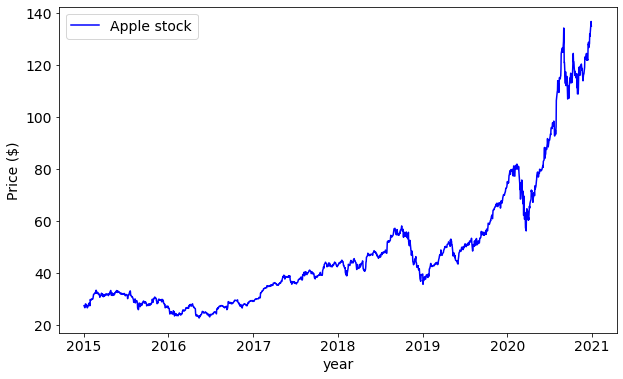

In [ ]:
#plot the close price column
plt.plot(Ap_close,label="Apple stock", color='b')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
plt.show()

In [ ]:
 # The return from one day to another is the percentage change of the closing price between the two days.
returns = Ap_close.pct_change(1).dropna()
returns[0:10]

Date
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
2015-01-09    0.001073
2015-01-12   -0.024641
2015-01-13    0.008879
2015-01-14   -0.003811
2015-01-15   -0.027140
2015-01-16   -0.007770
Name: Close, dtype: float64

In [ ]:
Ap_close.describe()

count    1509.000000
mean       48.004824
std        24.915496
min        22.584999
25%        29.812500
50%        41.312500
75%        53.865002
max       136.690002
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean = Ap_close.mean()
print('Mean: {}'.format(Ap_close.mean()))

median = Ap_close.median()
print('Median: {}'.format(Ap_close.median()))

mode = Ap_close.mode()
print('Mode: {}'.format(mode))

Mean: 48.00482434196295
Median: 41.3125
Mode: 0    24.334999
1    26.705000
2    31.650000
3    43.125000
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


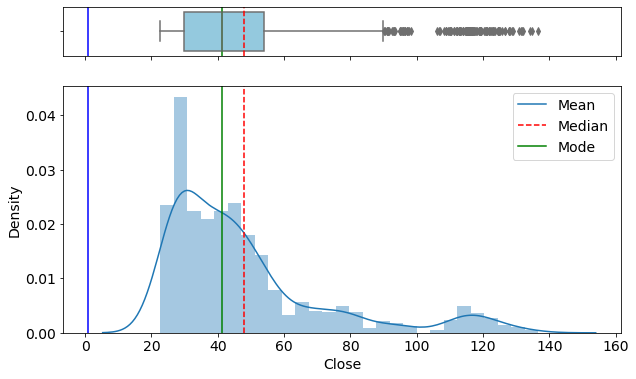

In [ ]:
import seaborn as sns
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(Ap_close, ax=ax_box,color='skyblue')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode.any(), color='b', linestyle='-')
sns.distplot(Ap_close, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode.any(), color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})
ax_box.set(xlabel='')
plt.show()

In [ ]:
from scipy.stats import skew
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(Ap_close)))

Skewness: 1.656006615797949


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(Ap_close, 25) 
Q2=np.percentile(Ap_close, 50)  
Q3=np.percentile(Ap_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))

Q1: 29.8125
Q2: 41.3125
Q3: 53.8650016784668


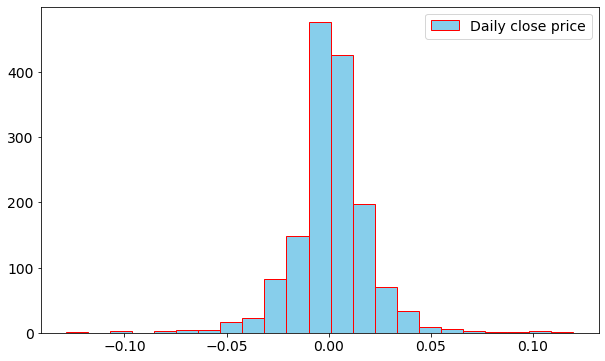

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()

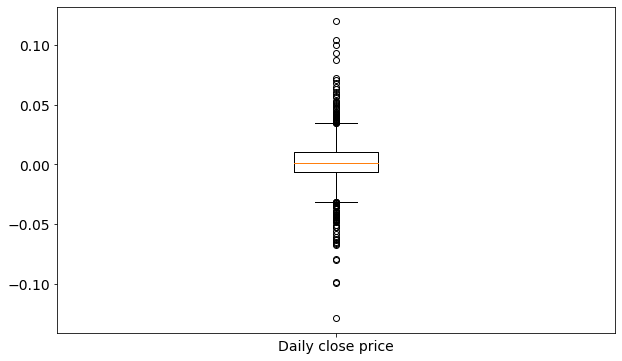

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns,labels=["Daily close price"])
plt.show()

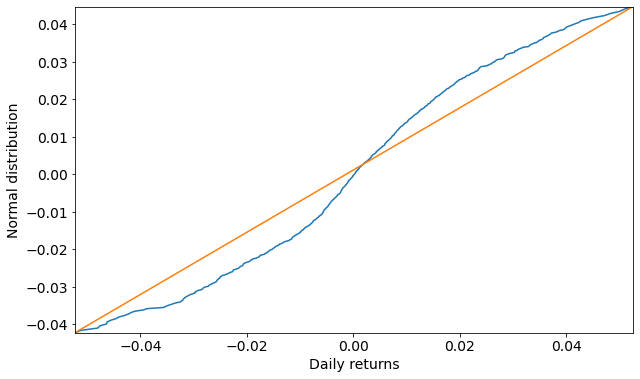

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

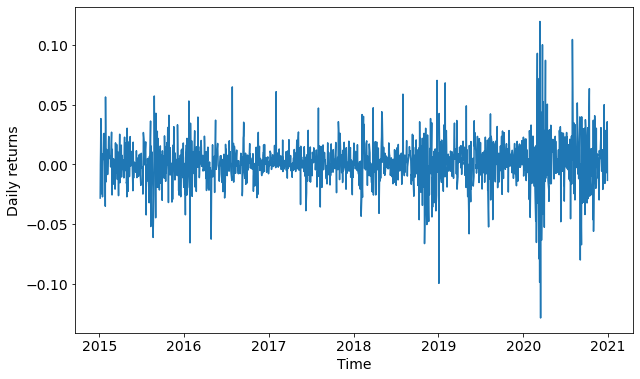

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

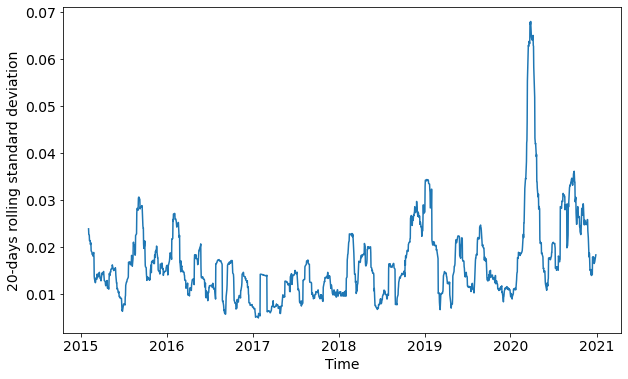

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

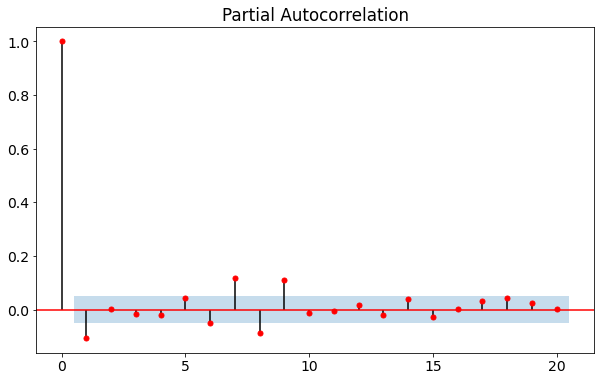

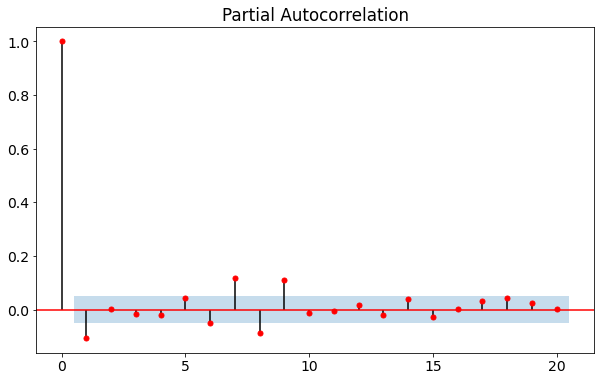

In [ ]:
# plot the partial autocorrelation function.
plot_pacf(returns,lags=20,color="red")


### 2. Microsoft Corp. (MSFT)

In [ ]:
Microsoft = yf.download("MSFT", start="2015-01-01", end="2020-12-30")
mic_close = Microsoft['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
Microsoft.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.443684,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.062580,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.459892,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.973934,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,42.179317,29645200


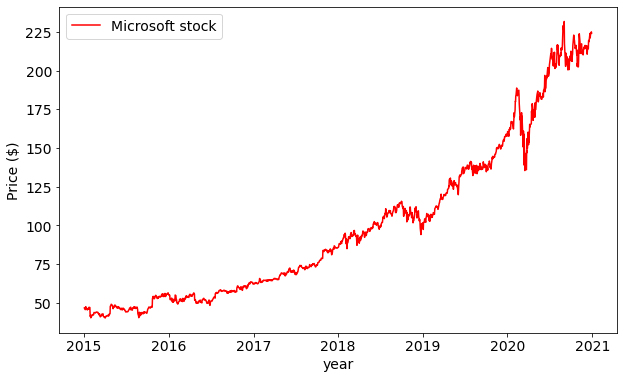

In [ ]:
plt.plot(mic_close,label="Microsoft stock", color='r')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
plt.show()


In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_mic = mic_close.pct_change(1).dropna()
returns_mic[0:10]


Date
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
2015-01-09   -0.008405
2015-01-12   -0.012503
2015-01-13   -0.005150
2015-01-14   -0.008628
2015-01-15   -0.010444
2015-01-16    0.016711
Name: Close, dtype: float64

In [ ]:
mic_close.describe()

count    1509.000000
mean       99.650530
std        51.724774
min        40.290001
25%        55.700001
50%        85.949997
75%       135.160004
max       231.649994
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_mic = mic_close.mean()
print('Mean: {}'.format(mic_close.mean()))

median_mic = mic_close.median()
print('Median: {}'.format(mic_close.median()))

mode_mic = mic_close.mode()
print('Mode: {}'.format(mode))


Mean: 99.65053021157317
Median: 85.94999694824219
Mode: 0    24.334999
1    26.705000
2    31.650000
3    43.125000
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


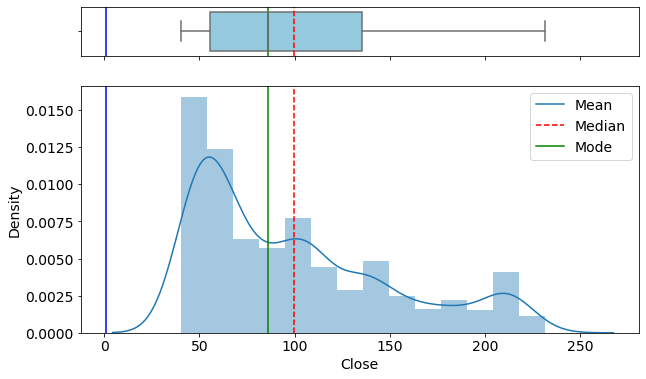

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(mic_close, ax=ax_box,color='skyblue')
ax_box.axvline(mean_mic, color='r', linestyle='--')
ax_box.axvline(median_mic, color='g', linestyle='-')
ax_box.axvline(mode_mic.any(), color='b', linestyle='-')
sns.distplot(mic_close, ax=ax_hist)
ax_hist.axvline(mean_mic, color='r', linestyle='--')
ax_hist.axvline(median_mic, color='g', linestyle='-')
ax_hist.axvline(mode_mic.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_mic,'Median':median_mic,'Mode':mode_mic})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(mic_close)))


Skewness: 0.879197833878525


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(mic_close, 25) 
Q2=np.percentile(mic_close, 50)  
Q3=np.percentile(mic_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 55.70000076293945
Q2: 85.94999694824219
Q3: 135.16000366210938


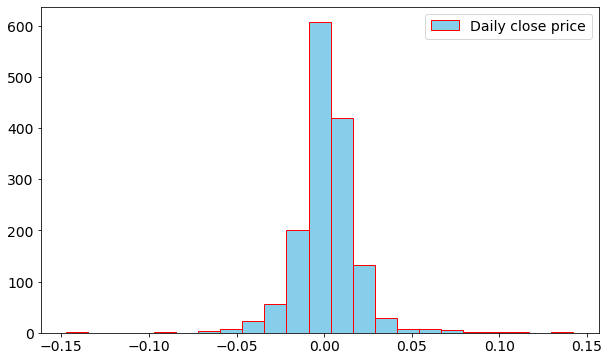

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_mic,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


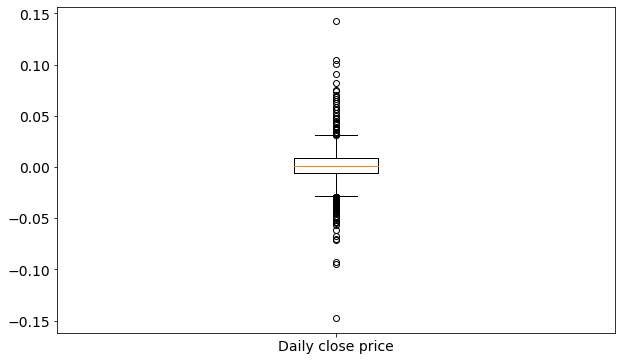

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_mic,labels=["Daily close price"])
plt.show()


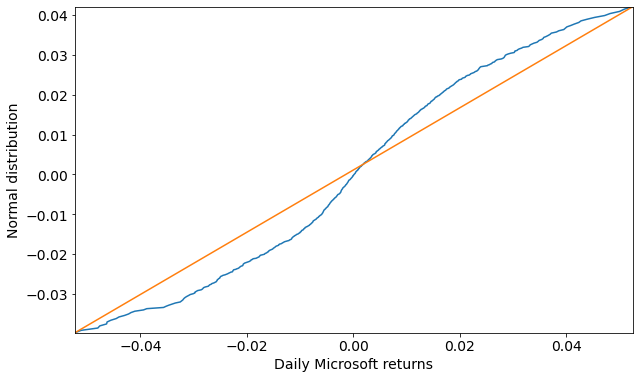

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns_mic),scale=np.std(returns_mic))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily Microsoft returns")
plt.ylabel("Normal distribution")
plt.show()


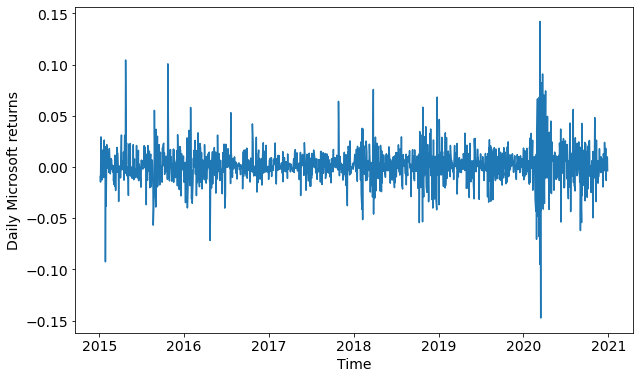

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_mic)
plt.xlabel("Time")
plt.ylabel("Daily Microsoft returns")

plt.show()


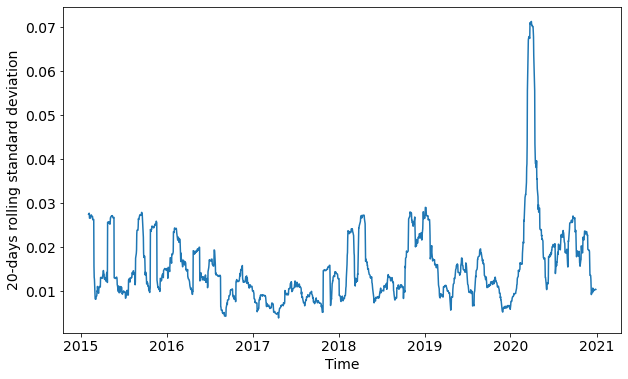

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_mic.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


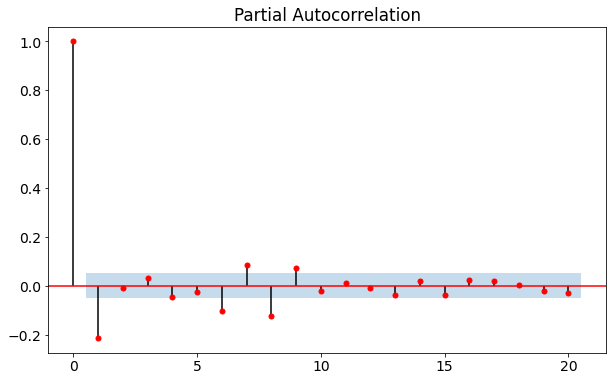

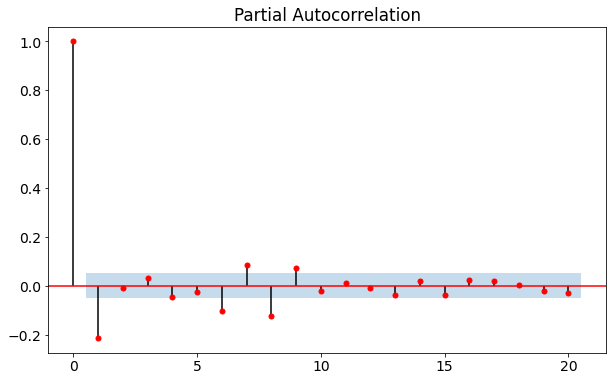

In [ ]:
# plot the partial autocorrelation function.
plot_pacf(returns_mic,lags=20,color="red")


### 3. Amazon.com Inc. (AMZN)

In [ ]:
Amazon = yf.download("AMZN", start="2015-01-01", end="2020-12-30")
Amz_close = Amazon['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
Amazon.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


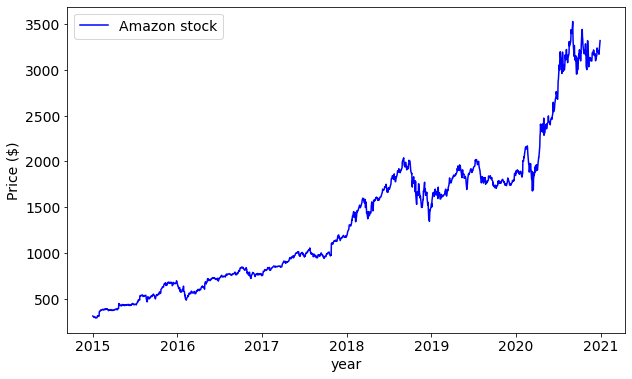

In [ ]:
plt.plot(Amz_close,label="Amazon stock", color='b')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
plt.show()


In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_amz = Amz_close.pct_change(1).dropna()
returns_amz[0:10]


Date
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
2015-01-09   -0.011749
2015-01-12   -0.018590
2015-01-13    0.011427
2015-01-14   -0.004987
2015-01-15   -0.021550
2015-01-16    0.013208
Name: Close, dtype: float64

In [ ]:
Amz_close.describe()

count    1509.000000
mean     1374.713790
std       789.508609
min       286.950012
25%       727.650024
50%      1193.599976
75%      1828.339966
max      3531.449951
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_amz = Amz_close.mean()
print('Mean: {}'.format(Amz_close.mean()))

median_amz = Ap_close.median()
print('Median: {}'.format(Amz_close.median()))

mode_amz = Amz_close.mode()
print('Mode: {}'.format(mode))


Mean: 1374.7137902969553
Median: 1193.5999755859375
Mode: 0    24.334999
1    26.705000
2    31.650000
3    43.125000
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


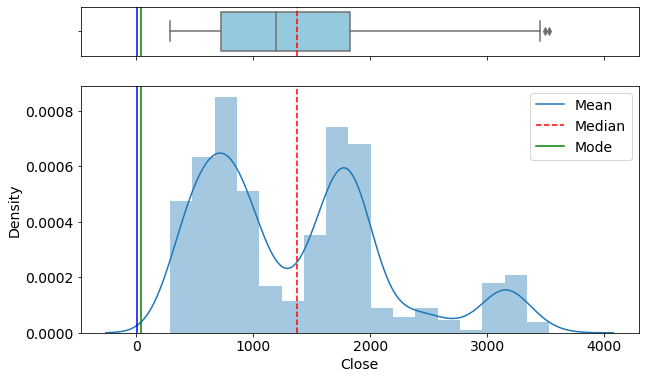

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(Amz_close, ax=ax_box,color='skyblue')
ax_box.axvline(mean_amz, color='r', linestyle='--')
ax_box.axvline(median_amz, color='g', linestyle='-')
ax_box.axvline(mode_amz.any(), color='b', linestyle='-')
sns.distplot(Amz_close, ax=ax_hist)
ax_hist.axvline(mean_amz, color='r', linestyle='--')
ax_hist.axvline(median_amz, color='g', linestyle='-')
ax_hist.axvline(mode_amz.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_amz,'Median':median_amz,'Mode':mode_amz})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(Amz_close)))


Skewness: 0.7724123531626501


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(Amz_close, 25) 
Q2=np.percentile(Amz_close, 50)  
Q3=np.percentile(Amz_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 727.6500244140625
Q2: 1193.5999755859375
Q3: 1828.3399658203125


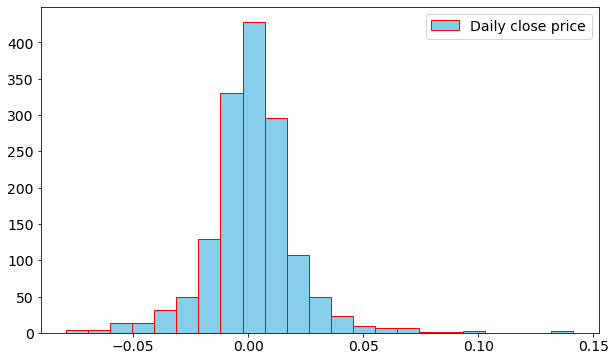

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_amz,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


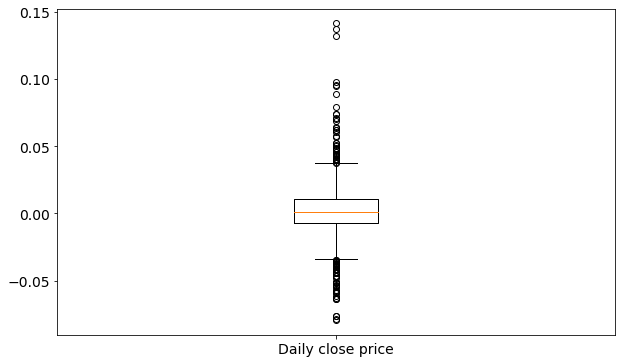

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_amz,labels=["Daily close price"])
plt.show()


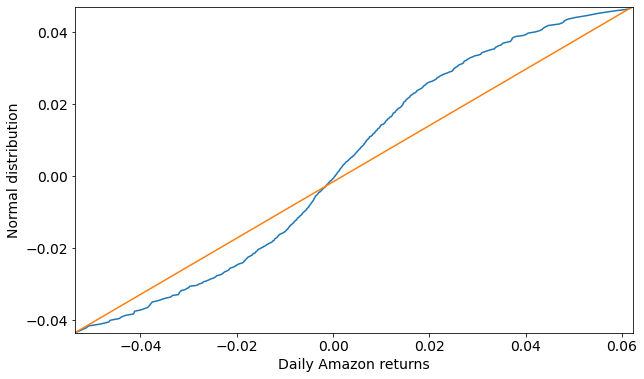

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_amz,t)
q2 = norm.ppf(t,loc=np.mean(returns_amz),scale=np.std(returns_amz))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily Amazon returns")
plt.ylabel("Normal distribution")
plt.show()


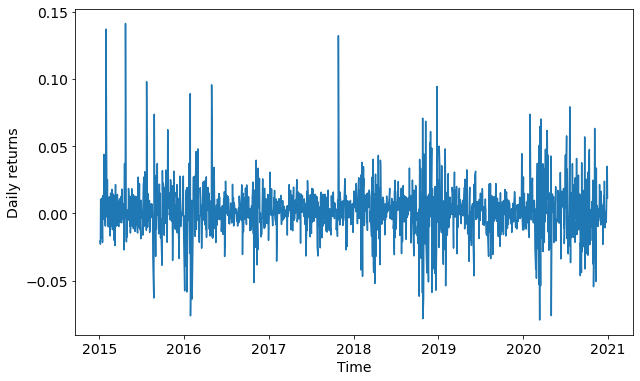

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_amz)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


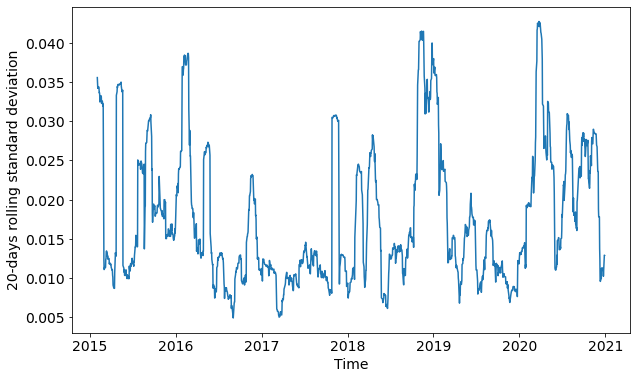

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_amz.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


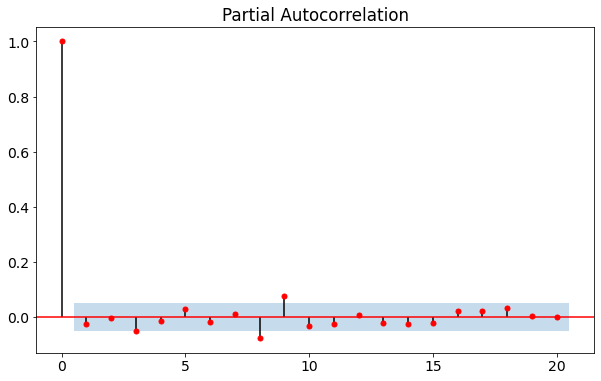

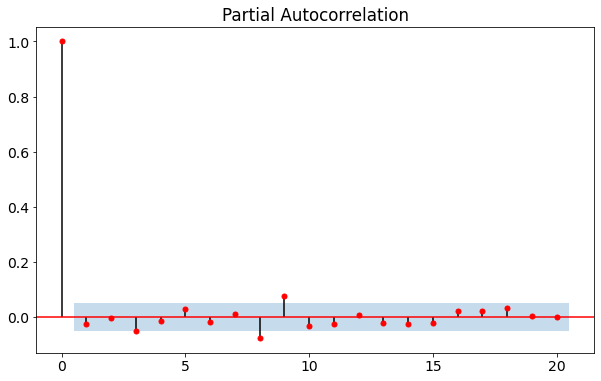

In [ ]:
# plot the partial autocorrelation function.
plot_pacf(returns_amz,lags=20,color="red")


### 4. Facebook Inc. (FB)

In [ ]:
Facebook = yf.download("FB", start="2015-01-01", end="2020-12-30")
FB_close = Facebook['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
Facebook.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


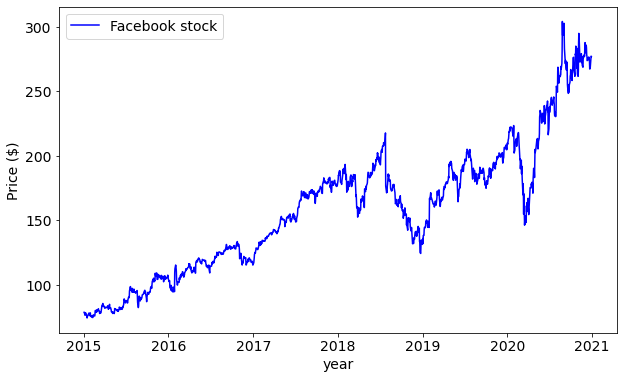

In [ ]:
plt.plot(FB_close,label="Facebook stock", color='b')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
plt.show()


In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_fb = FB_close.pct_change(1).dropna()
returns_fb[0:10]


Date
2015-01-05   -0.016061
2015-01-06   -0.013473
2015-01-07    0.000000
2015-01-08    0.026658
2015-01-09   -0.005628
2015-01-12   -0.013121
2015-01-13   -0.003519
2015-01-14   -0.002224
2015-01-15   -0.029234
2015-01-16    0.015260
Name: Close, dtype: float64

In [ ]:
FB_close.describe()

count    1509.000000
mean      158.239006
std        51.080965
min        74.050003
25%       117.699997
50%       162.000000
75%       186.889999
max       303.910004
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_fb = FB_close.mean()
print('Mean: {}'.format(FB_close.mean()))

median_fb = FB_close.median()
print('Median: {}'.format(FB_close.median()))

mode_fb = FB_close.mode()
print('Mode: {}'.format(mode))


Mean: 158.23900591608228
Median: 162.0
Mode: 0    24.334999
1    26.705000
2    31.650000
3    43.125000
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


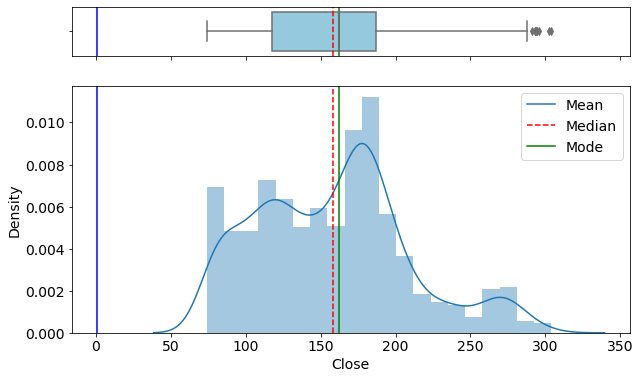

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(FB_close, ax=ax_box,color='skyblue')
ax_box.axvline(mean_fb, color='r', linestyle='--')
ax_box.axvline(median_fb, color='g', linestyle='-')
ax_box.axvline(mode_fb.any(), color='b', linestyle='-')
sns.distplot(FB_close, ax=ax_hist)
ax_hist.axvline(mean_fb, color='r', linestyle='--')
ax_hist.axvline(median_fb, color='g', linestyle='-')
ax_hist.axvline(mode_fb.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_fb,'Median':median_fb,'Mode':mode_fb})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(FB_close)))


Skewness: 0.44394322598395375


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(FB_close, 25) 
Q2=np.percentile(FB_close, 50)  
Q3=np.percentile(FB_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 117.69999694824219
Q2: 162.0
Q3: 186.88999938964844


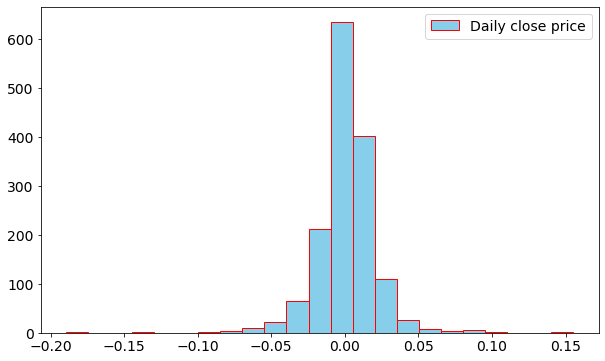

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_fb,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


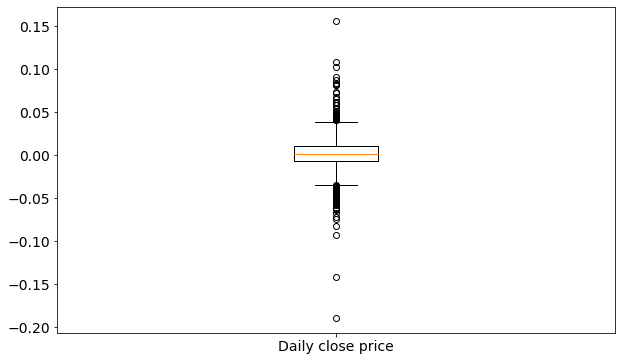

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_fb,labels=["Daily close price"])
plt.show()


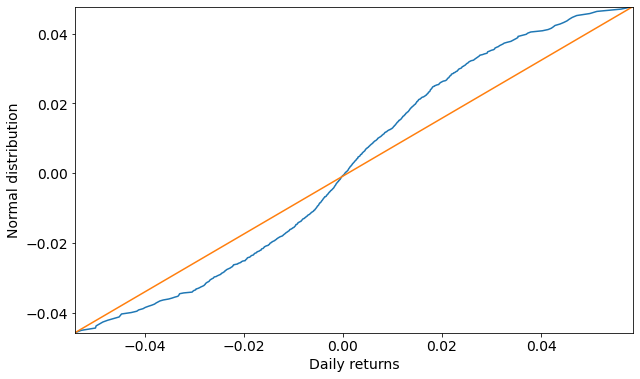

In [ ]:
# Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_fb,t)
q2 = norm.ppf(t,loc=np.mean(returns_fb),scale=np.std(returns_fb))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()


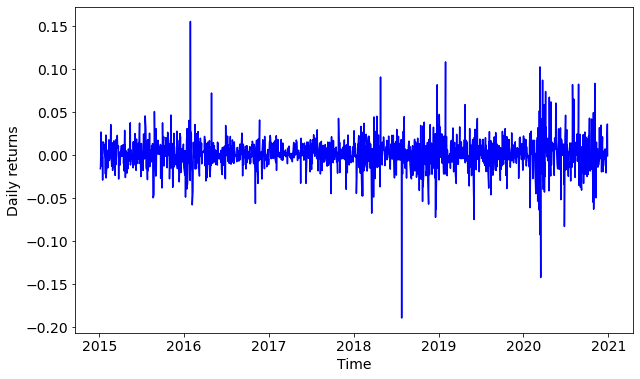

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_fb,color = 'b')
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


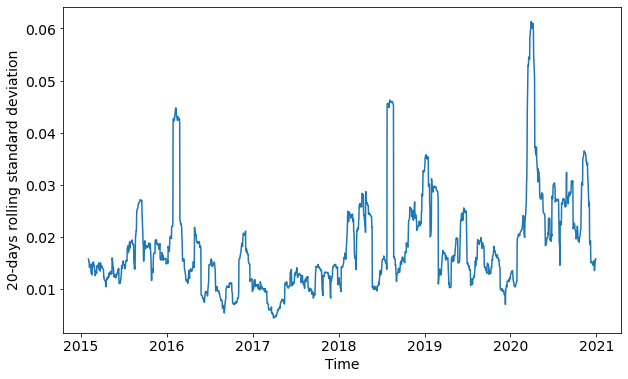

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_fb.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


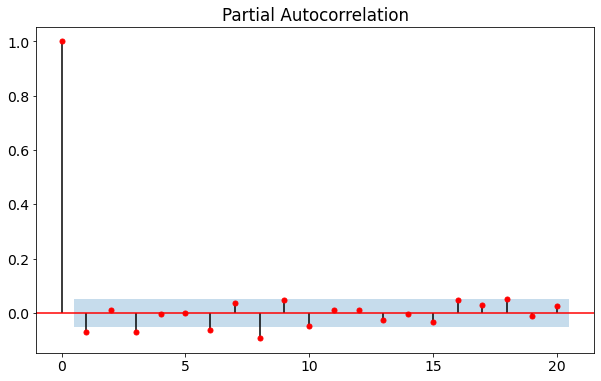

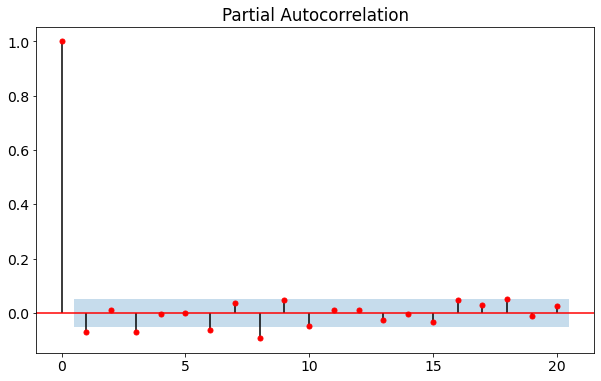

In [ ]:
# plot the partial autocorrelation function.
plot_pacf(returns_fb,lags=20,color="r")


### 5. Alphabet Inc. Class A Shares (GOOGL)

In [ ]:
GOOGL = yf.download("GOOGL", start="2015-01-01", end="2020-12-30")
go_close = GOOGL['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
GOOGL.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,532.599976,535.799988,527.880005,529.549988,529.549988,1324000
2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800
2015-01-07,510.950012,511.489990,503.649994,505.149994,505.149994,2345900
2015-01-08,501.510010,507.500000,495.019989,506.910004,506.910004,3652700


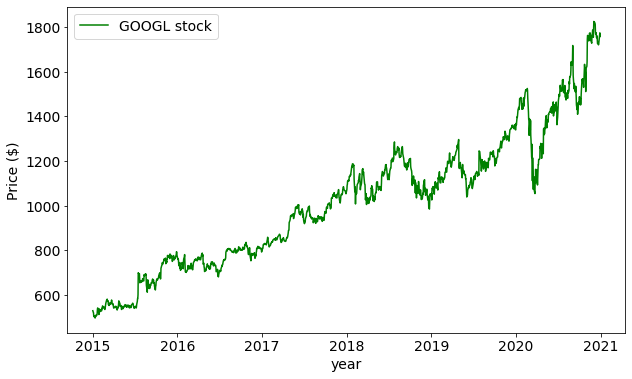

In [ ]:
plt.plot(go_close,label="GOOGL stock", color='g')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
plt.show()


In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_go = go_close.pct_change(1).dropna()
returns_go[0:10]


Date
2015-01-05   -0.019054
2015-01-06   -0.024679
2015-01-07   -0.002941
2015-01-08    0.003484
2015-01-09   -0.012211
2015-01-12   -0.007309
2015-01-13    0.009536
2015-01-14    0.008230
2015-01-15   -0.003795
2015-01-16    0.012797
Name: Close, dtype: float64

In [ ]:
go_close.describe()

count    1509.000000
mean     1018.532657
std       299.229132
min       497.059998
25%       770.770020
50%      1038.739990
75%      1202.689941
max      1824.969971
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_go = go_close.mean()
print('Mean: {}'.format(go_close.mean()))

median_go = go_close.median()
print('Median: {}'.format(go_close.median()))

mode_go = go_close.mode()
print('Mode: {}'.format(mode))


Mean: 1018.5326574084141
Median: 1038.739990234375
Mode: 0    24.334999
1    26.705000
2    31.650000
3    43.125000
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


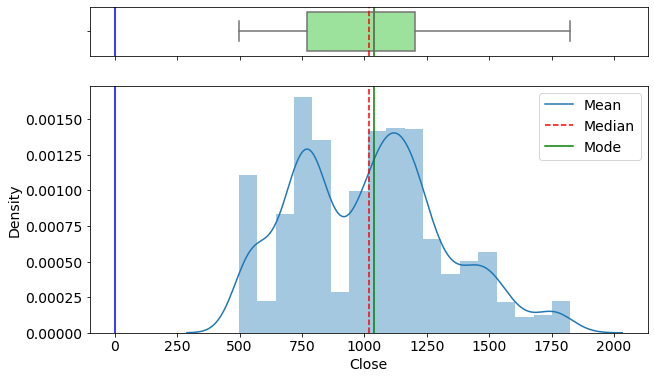

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(go_close, ax=ax_box,color='lightgreen')
ax_box.axvline(mean_go, color='r', linestyle='--')
ax_box.axvline(median_go, color='g', linestyle='-')
ax_box.axvline(mode_go.any(), color='b', linestyle='-')
sns.distplot(go_close, ax=ax_hist)
ax_hist.axvline(mean_go, color='r', linestyle='--')
ax_hist.axvline(median_go, color='g', linestyle='-')
ax_hist.axvline(mode_go.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_go,'Median':median_go,'Mode':mode_go})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(go_close)))


Skewness: 0.3517367586980008


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(go_close, 25) 
Q2=np.percentile(go_close, 50)  
Q3=np.percentile(go_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 770.77001953125
Q2: 1038.739990234375
Q3: 1202.68994140625


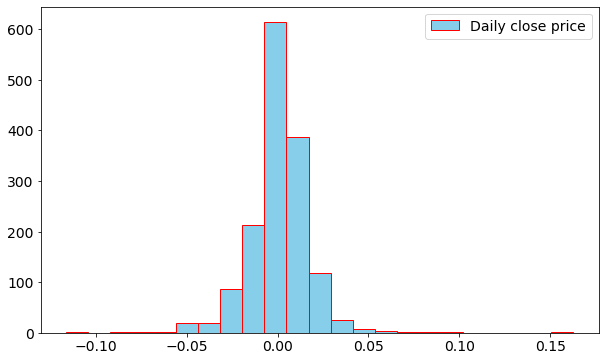

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_go,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


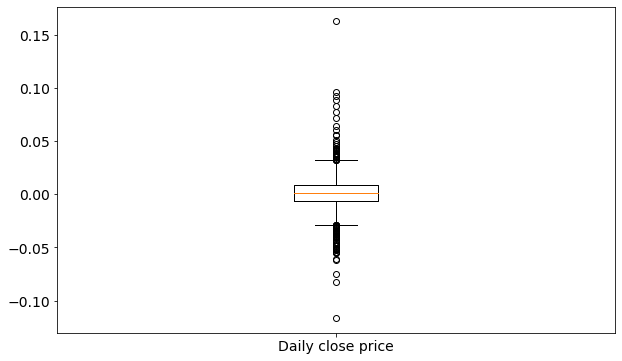

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_go,labels=["Daily close price"])
plt.show()


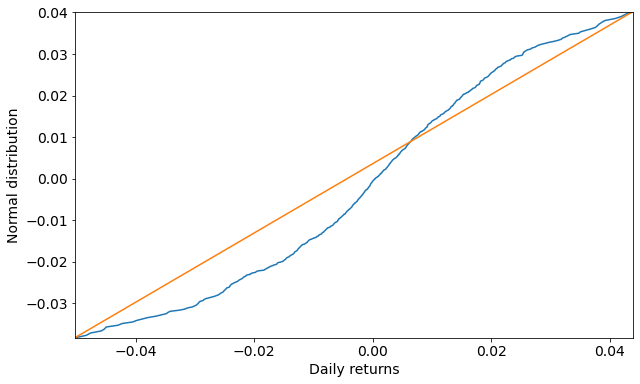

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_go,t)
q2 = norm.ppf(t,loc=np.mean(returns_go),scale=np.std(returns_go))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()


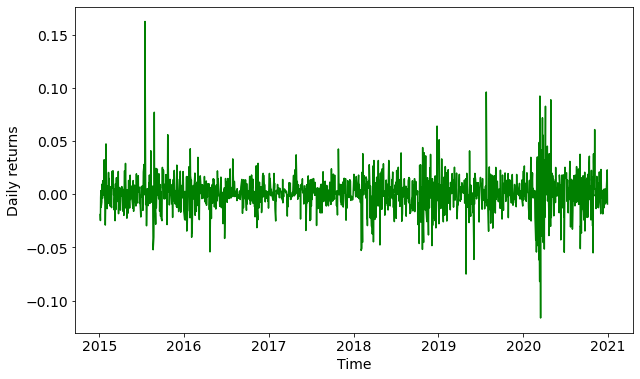

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_go,color = 'g')
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


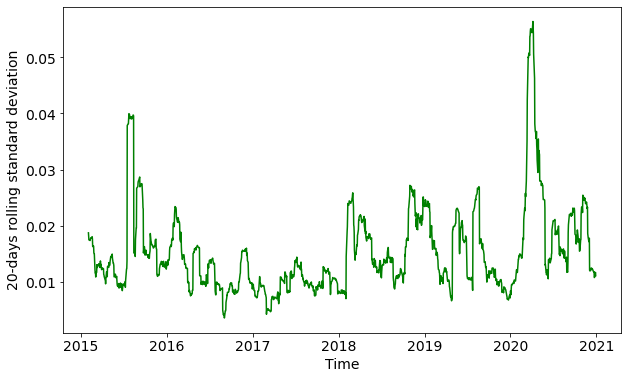

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_go.rolling(20).std(),color = 'g')
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


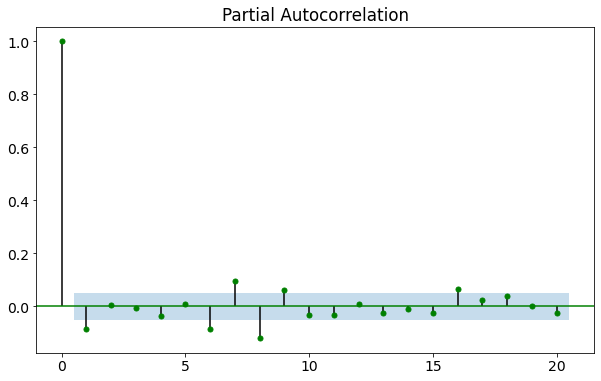

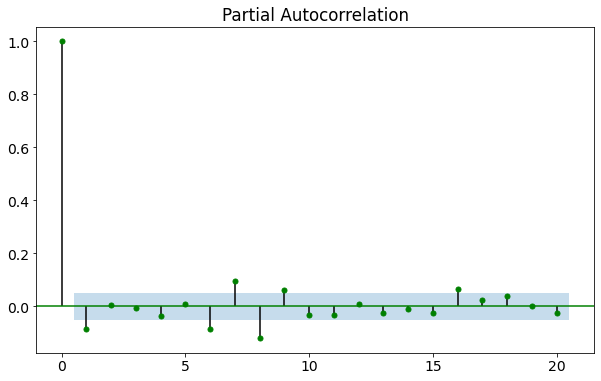

In [ ]:
# plot the partial autocorrelation function.
plot_pacf(returns_go,lags=20,color="g")


# 6. Alphabet Inc. Class C Shares (GOOG)

---



## Data Analysis

In [ ]:
GOOG = yf.download("GOOG", start="2015-01-01", end="2020-12-30")
goog_close = GOOG['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
GOOG.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582


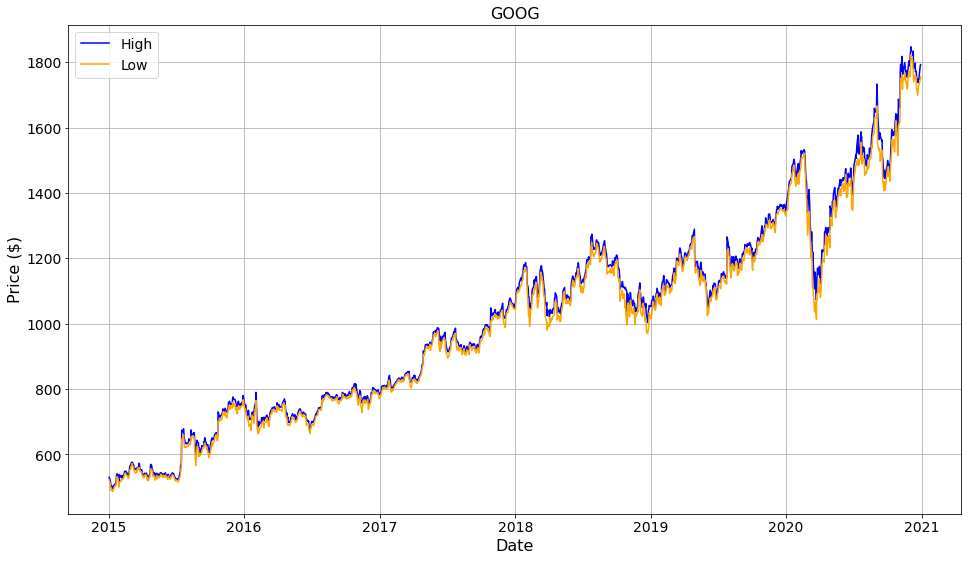

In [ ]:
#Stock price from 2015 - 2021
plt.rcParams["figure.figsize"] = [16,9]
#plt.plot(GOOG['Open'], color='g', label="Open")
#plt.plot(GOOG['Close'], color='r', label="Close")
plt.plot(GOOG['High'], color='b', label="High")
plt.plot(GOOG['Low'], color='orange', label="Low")
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.title('GOOG', fontsize=16)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

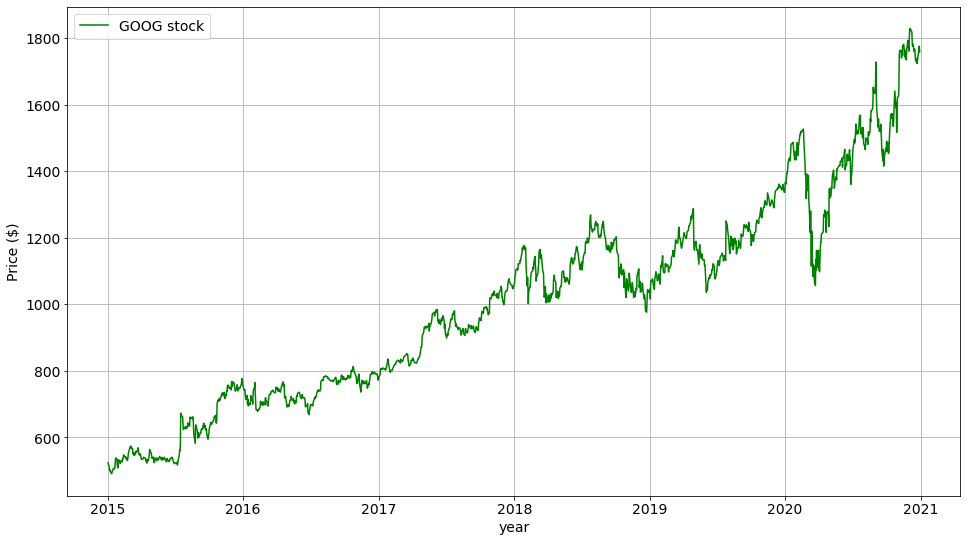

In [ ]:
plt.plot(goog_close,label="GOOG stock", color='g')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [16, 9]
plt.rc('font', size=14)
plt.grid(True)
plt.show()


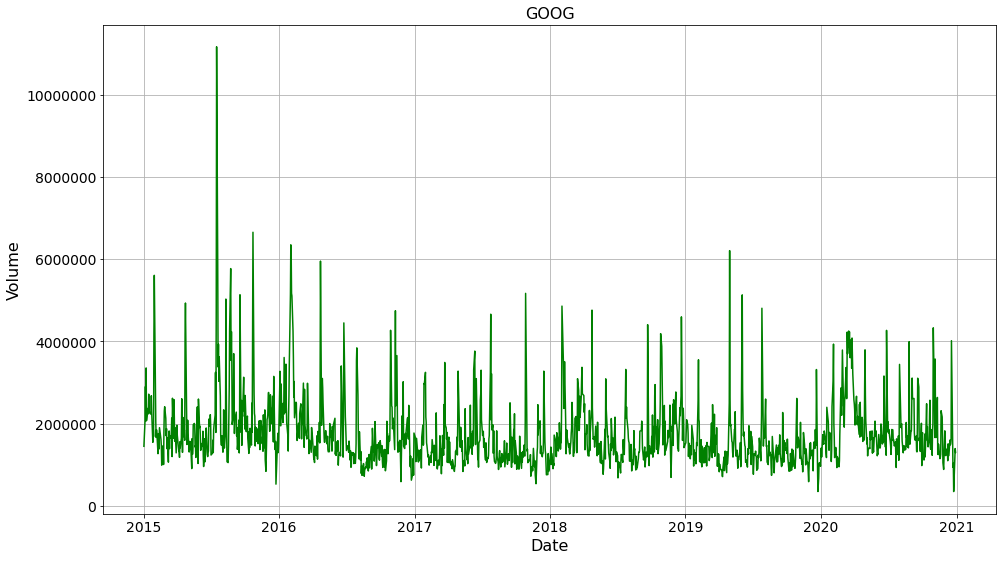

In [ ]:
goog_volume = GOOG[['Volume']]

plt.plot(goog_volume['Volume'], color='g')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.title('GOOG', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.show()

In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_goog = goog_close.pct_change(1).dropna()
returns_goog[0:10]


Date
2015-01-05   -0.020846
2015-01-06   -0.023177
2015-01-07   -0.001713
2015-01-08    0.003153
2015-01-09   -0.012951
2015-01-12   -0.007296
2015-01-13    0.007370
2015-01-14    0.009452
2015-01-15    0.001837
2015-01-16    0.012535
Name: Close, dtype: float64

In [ ]:
goog_close.describe()

count    1509.000000
mean     1007.706690
std       306.544430
min       491.201416
25%       751.719971
50%      1028.069946
75%      1195.880005
max      1827.989990
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_goog = goog_close.mean()
print('Mean: {}'.format(goog_close.mean()))

median_goog = goog_close.median()
print('Median: {}'.format(goog_close.median()))

mode_goog = goog_close.mode()
print('Mode: {}'.format(mode))


Mean: 1007.7066899951204
Median: 1028.0699462890625
Mode: 0    24.334999
1    26.705000
2    31.650000
3    43.125000
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


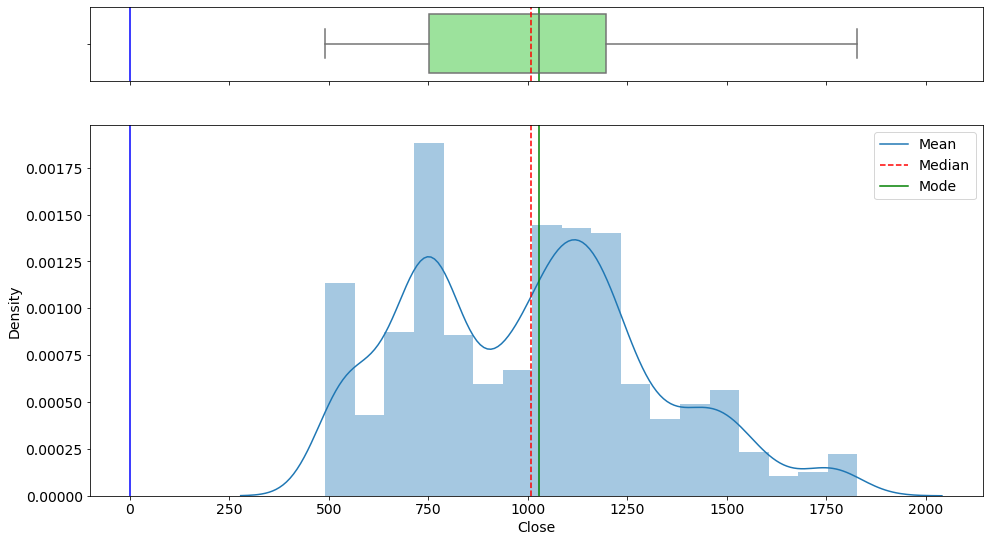

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(goog_close, ax=ax_box,color='lightgreen')
ax_box.axvline(mean_goog, color='r', linestyle='--')
ax_box.axvline(median_goog, color='g', linestyle='-')
ax_box.axvline(mode_goog.any(), color='b', linestyle='-')
sns.distplot(goog_close, ax=ax_hist)
ax_hist.axvline(mean_goog, color='r', linestyle='--')
ax_hist.axvline(median_goog, color='g', linestyle='-')
ax_hist.axvline(mode_goog.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_goog,'Median':median_goog,'Mode':mode_goog})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(goog_close)))


Skewness: 0.36717521540804204


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(goog_close, 25) 
Q2=np.percentile(goog_close, 50)  
Q3=np.percentile(goog_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 751.719970703125
Q2: 1028.0699462890625
Q3: 1195.8800048828125


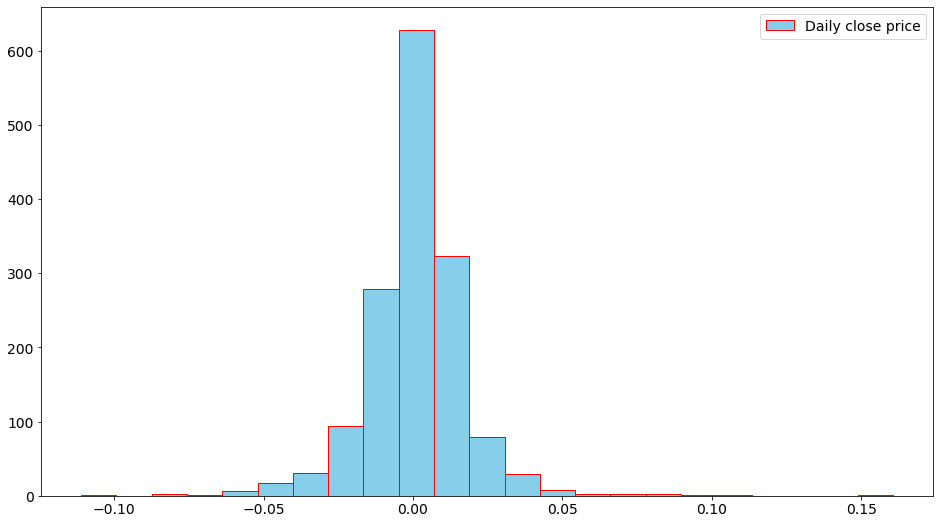

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_goog,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


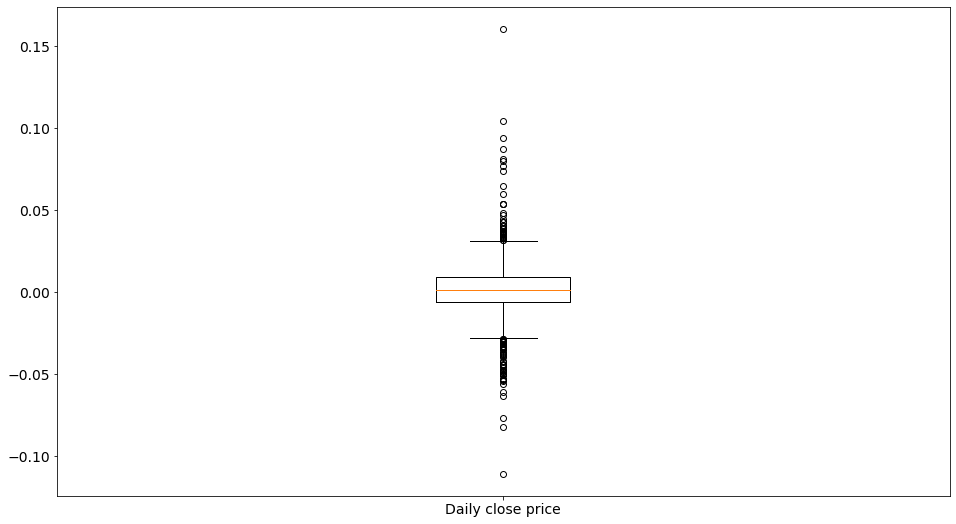

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_goog,labels=["Daily close price"])
plt.show()


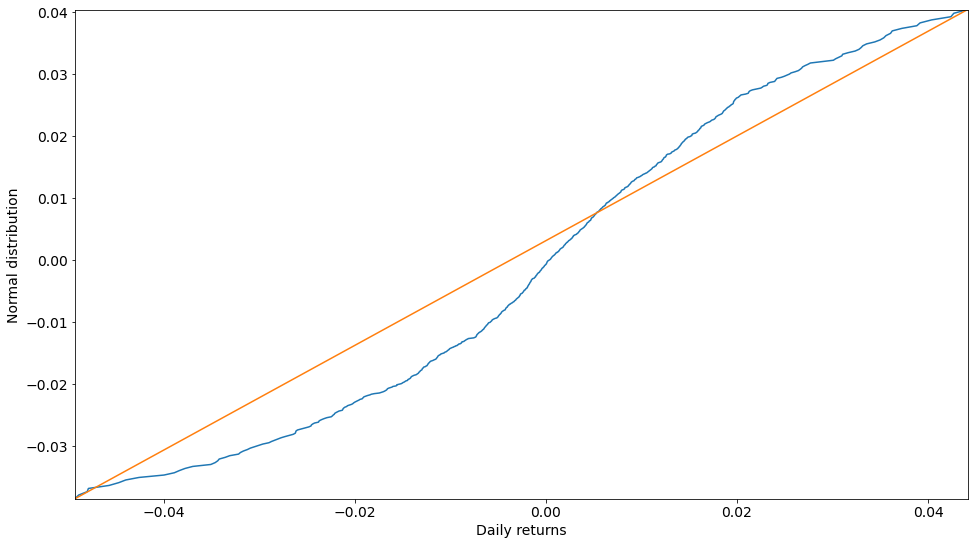

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_goog,t)
q2 = norm.ppf(t,loc=np.mean(returns_goog),scale=np.std(returns_goog))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()


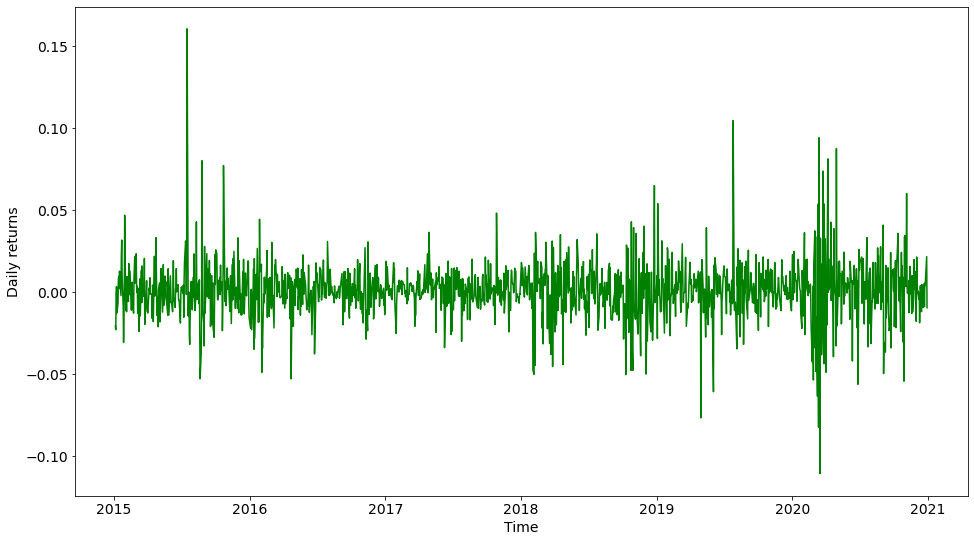

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_goog,color = 'g')
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


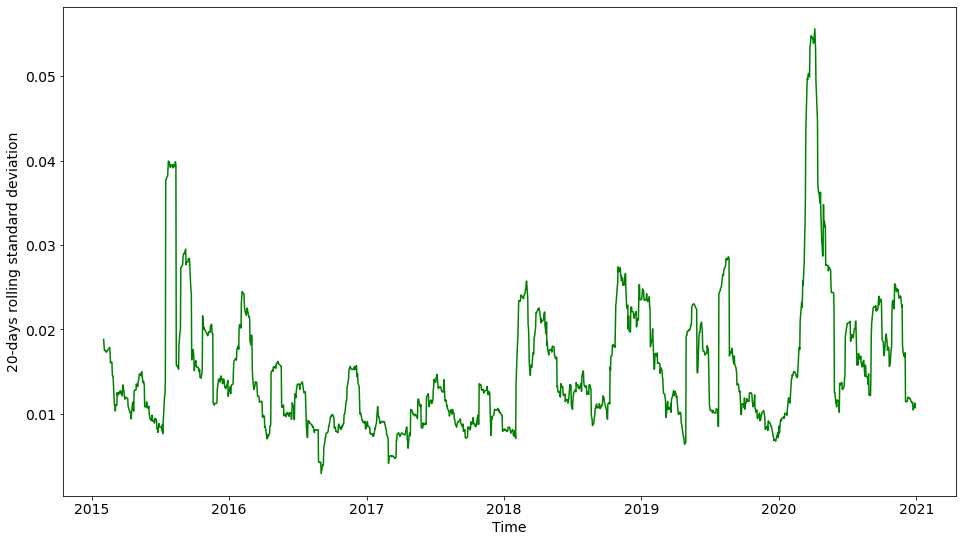

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_goog.rolling(20).std(),color = 'g')
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


Figure(1152x648)


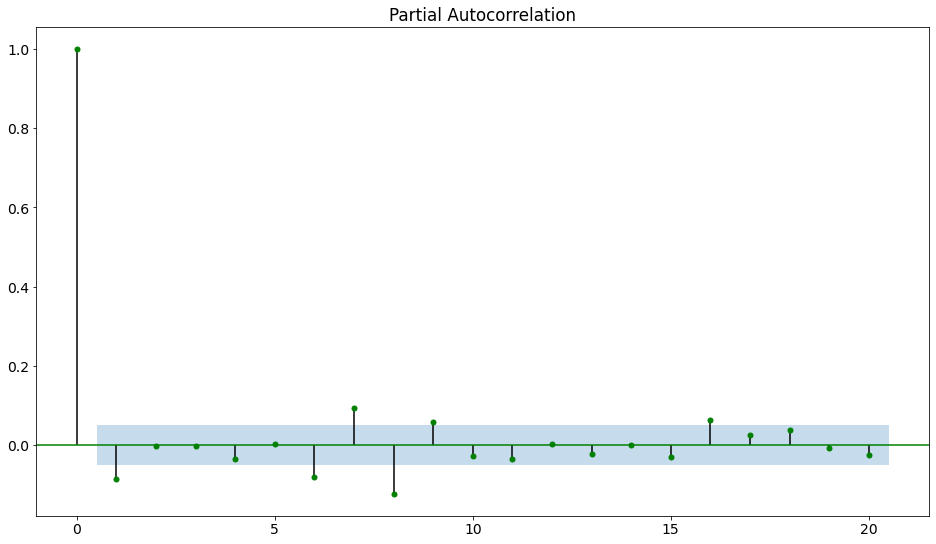

In [ ]:
# plot the partial autocorrelation function.
print(plot_pacf(returns_goog,lags=20,color="g"))


# 7. Tesla Inc.(TSLA)


## Data Analysis

In [ ]:
TSLA = yf.download("TSLA", start="2015-01-01", end="2020-12-30")
TSLA_close = TSLA['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
TSLA.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500


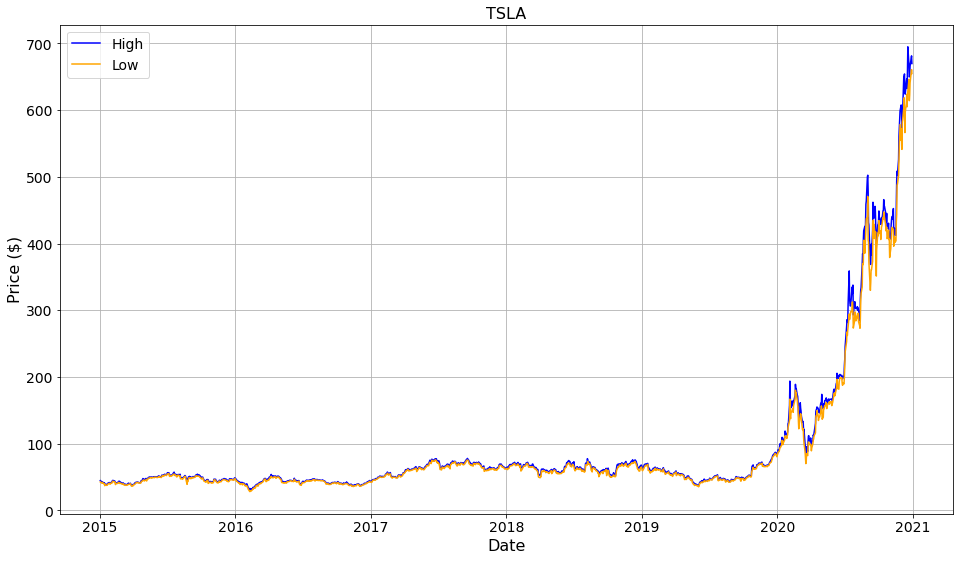

In [ ]:
#Stock price from 2015 - 2021
plt.rcParams["figure.figsize"] = [16,9]
#plt.plot(TSLA['Open'], color='g', label="Open")
#plt.plot(TSLA['Close'], color='r', label="Close")
plt.plot(TSLA['High'], color='b', label="High")
plt.plot(TSLA['Low'], color='orange', label="Low")
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.title('TSLA', fontsize=16)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

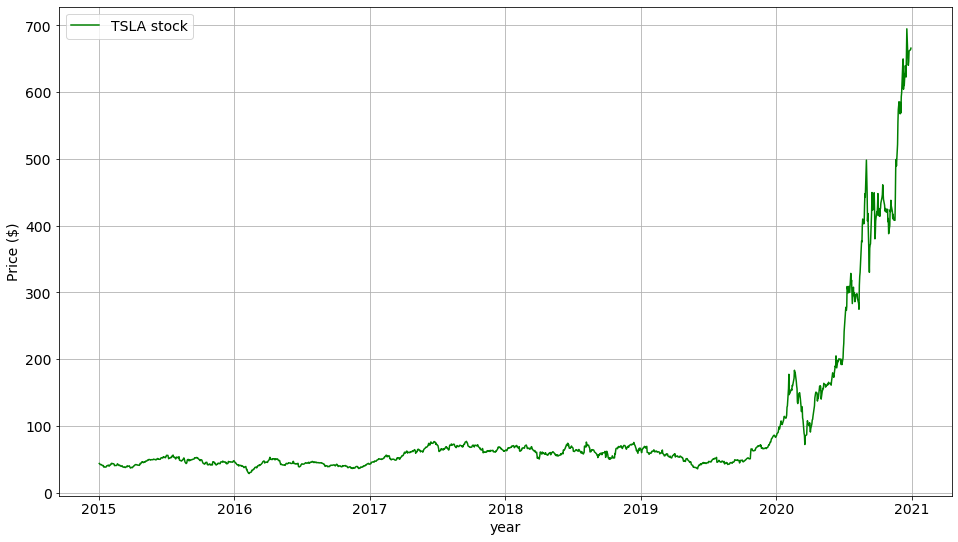

In [ ]:
plt.plot(TSLA_close,label="TSLA stock", color='g')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [16, 9]
plt.rc('font', size=14)
plt.grid(True)
plt.show()


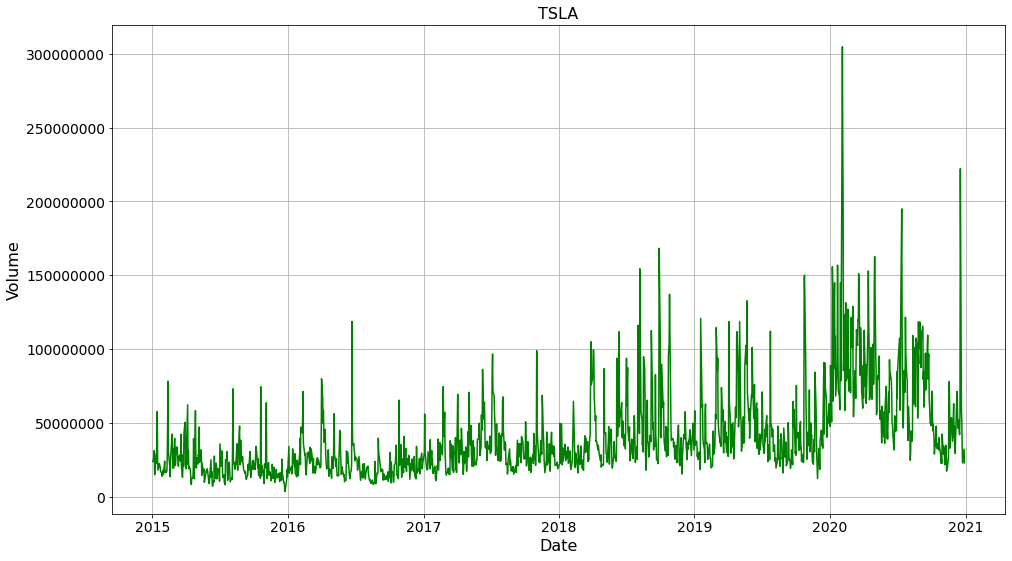

In [ ]:
TSLA_volume = TSLA[['Volume']]

plt.plot(TSLA_volume['Volume'], color='g')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.title('TSLA', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.show()

In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_TSLA = TSLA_close.pct_change(1).dropna()
returns_TSLA[0:10]


Date
2015-01-05   -0.042041
2015-01-06    0.005664
2015-01-07   -0.001562
2015-01-08   -0.001564
2015-01-09   -0.018802
2015-01-12   -0.021533
2015-01-13    0.010088
2015-01-14   -0.056597
2015-01-15   -0.004255
2015-01-16    0.006254
Name: Close, dtype: float64

In [ ]:
TSLA_close.describe()

count    1509.000000
mean       92.530681
std       110.372851
min        28.733999
25%        45.414001
50%        56.827999
75%        69.472000
max       695.000000
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_TSLA = TSLA_close.mean()
print('Mean: {}'.format(TSLA_close.mean()))

median_TSLA = TSLA_close.median()
print('Median: {}'.format(TSLA_close.median()))

mode_TSLA = TSLA_close.mode()
print('Mode: {}'.format(TSLA_close.mode()))


Mean: 92.53068120689721
Median: 56.827999114990234
Mode: 0    42.018002
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


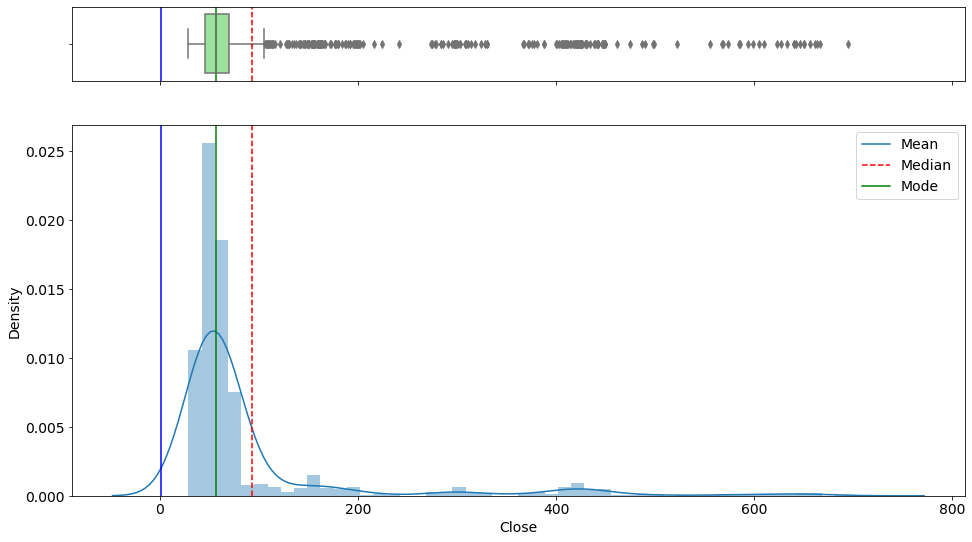

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(TSLA_close, ax=ax_box,color='lightgreen')
ax_box.axvline(mean_TSLA, color='r', linestyle='--')
ax_box.axvline(median_TSLA, color='g', linestyle='-')
ax_box.axvline(mode_TSLA.any(), color='b', linestyle='-')
sns.distplot(TSLA_close, ax=ax_hist)
ax_hist.axvline(mean_TSLA, color='r', linestyle='--')
ax_hist.axvline(median_TSLA, color='g', linestyle='-')
ax_hist.axvline(mode_TSLA.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_TSLA,'Median':median_TSLA,'Mode':mode_TSLA})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(TSLA_close)))


Skewness: 3.1874721046277363


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(TSLA_close, 25) 
Q2=np.percentile(TSLA_close, 50)  
Q3=np.percentile(TSLA_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 45.41400146484375
Q2: 56.827999114990234
Q3: 69.47200012207031


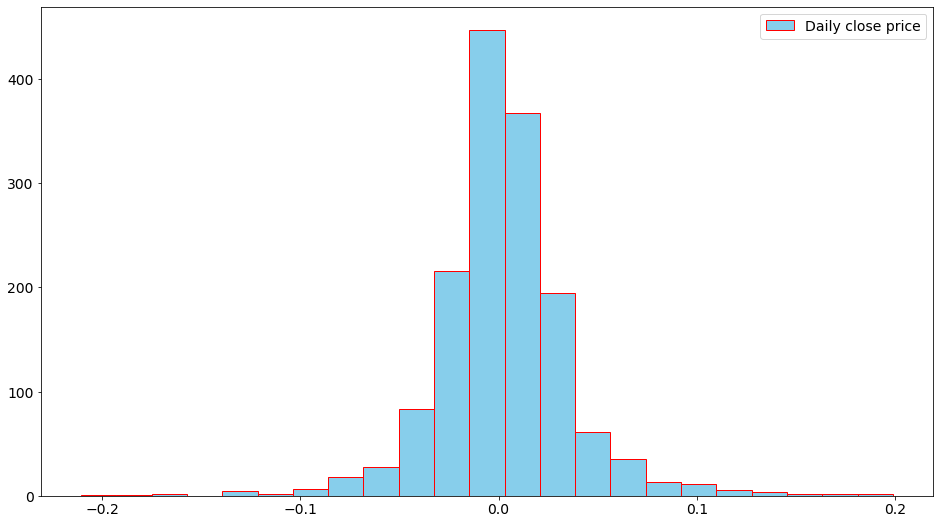

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_TSLA,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


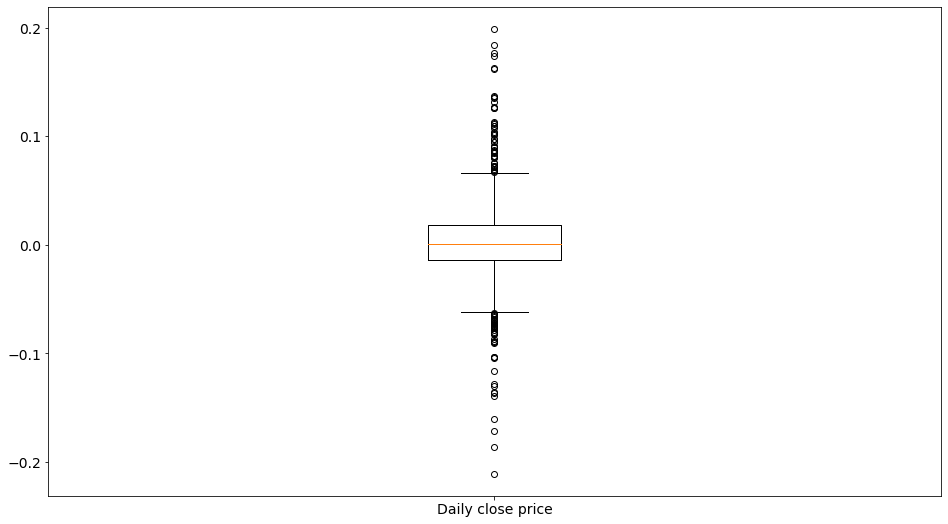

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_TSLA,labels=["Daily close price"])
plt.show()


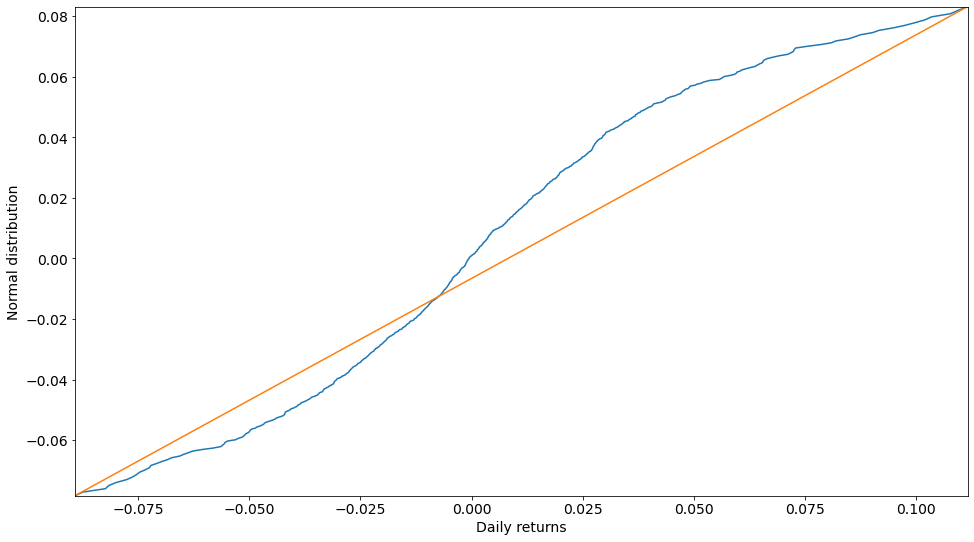

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_TSLA,t)
q2 = norm.ppf(t,loc=np.mean(returns_TSLA),scale=np.std(returns_TSLA))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()


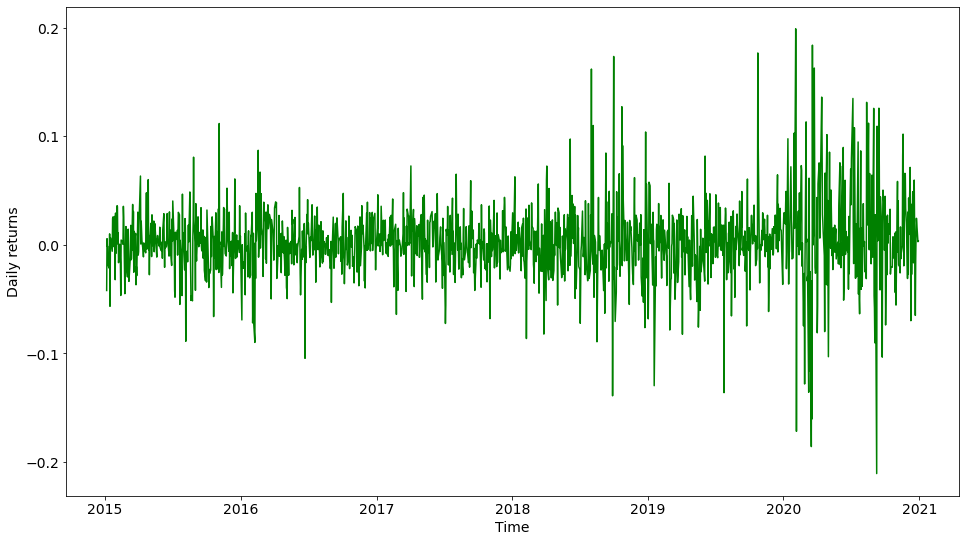

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_TSLA,color = 'g')
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


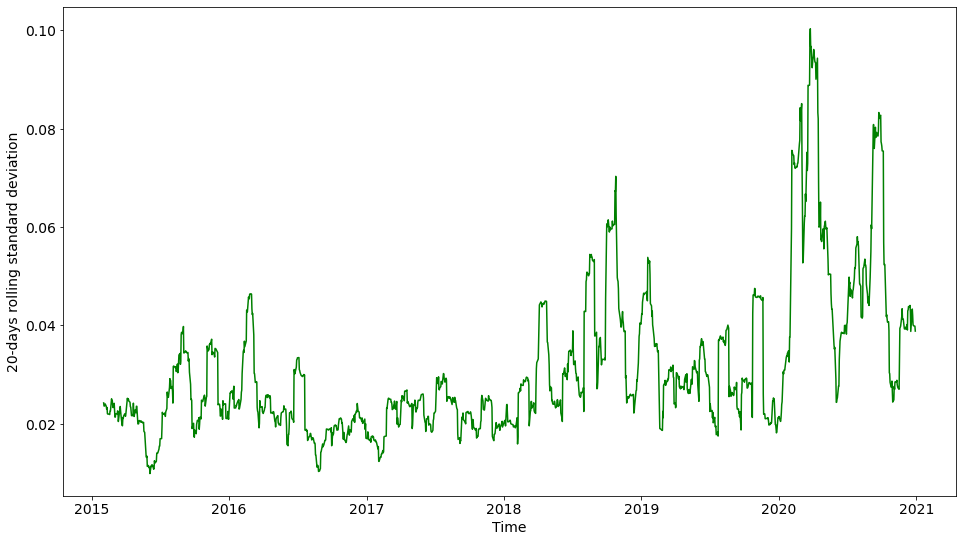

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_TSLA.rolling(20).std(),color = 'g')
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


Figure(1152x648)


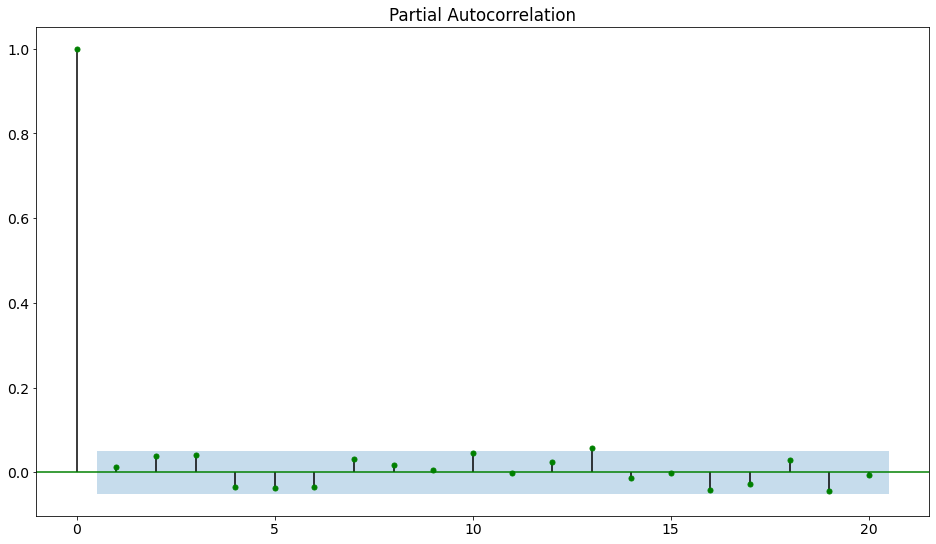

In [ ]:
# plot the partial autocorrelation function.
print(plot_pacf(returns_TSLA,lags=20,color="g"))


## 8. JPMorgan Chase & Co. (JPM)

## Data Analysis

In [ ]:
JPM = yf.download("JPM", start="2015-01-01", end="2020-12-30")
JPM_close = JPM['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
JPM.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,62.180000,62.959999,62.070000,62.490002,52.506710,12600000
2015-01-05,62.060001,62.279999,60.230000,60.549999,50.876637,20100600
2015-01-06,60.639999,60.750000,58.349998,58.980000,49.557465,29074100
2015-01-07,59.889999,59.889999,58.669998,59.070000,49.633072,23843200
2015-01-08,59.970001,60.900002,59.970001,60.389999,50.742188,16971100


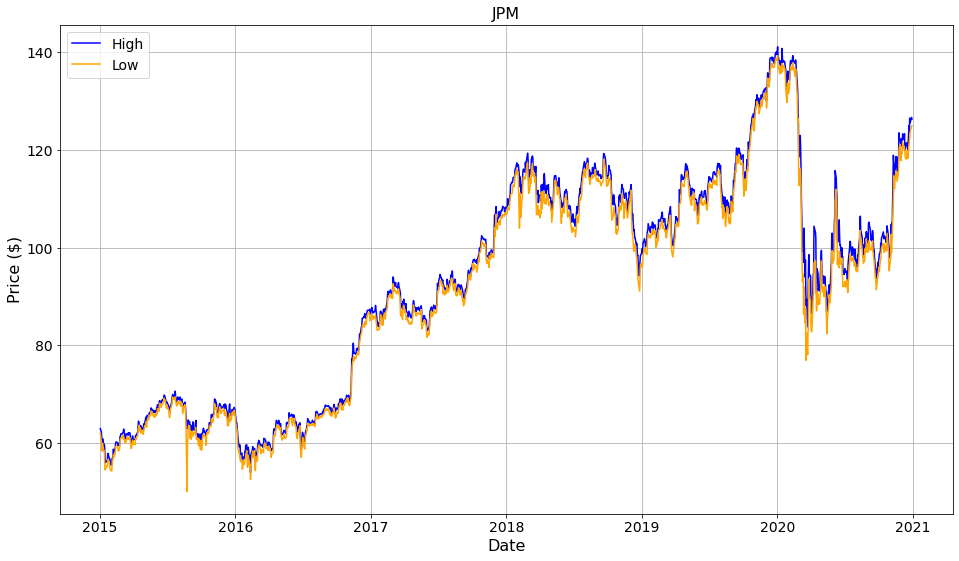

In [ ]:
#Stock price from 2015 - 2021
plt.rcParams["figure.figsize"] = [16,9]
#plt.plot(JPM['Open'], color='g', label="Open")
#plt.plot(JPM['Close'], color='r', label="Close")
plt.plot(JPM['High'], color='b', label="High")
plt.plot(JPM['Low'], color='orange', label="Low")
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.title('JPM', fontsize=16)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

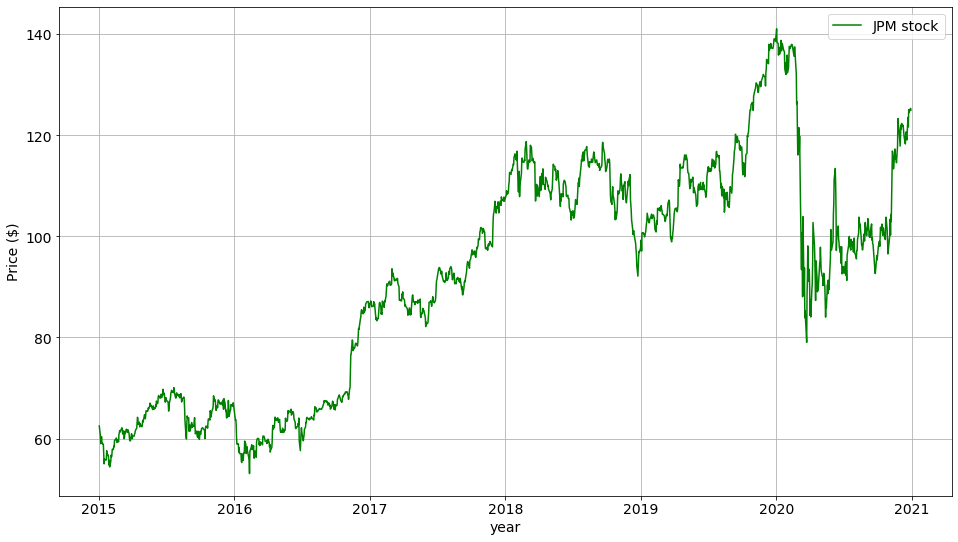

In [ ]:
plt.plot(JPM_close,label="JPM stock", color='g')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [16, 9]
plt.rc('font', size=14)
plt.grid(True)
plt.show()


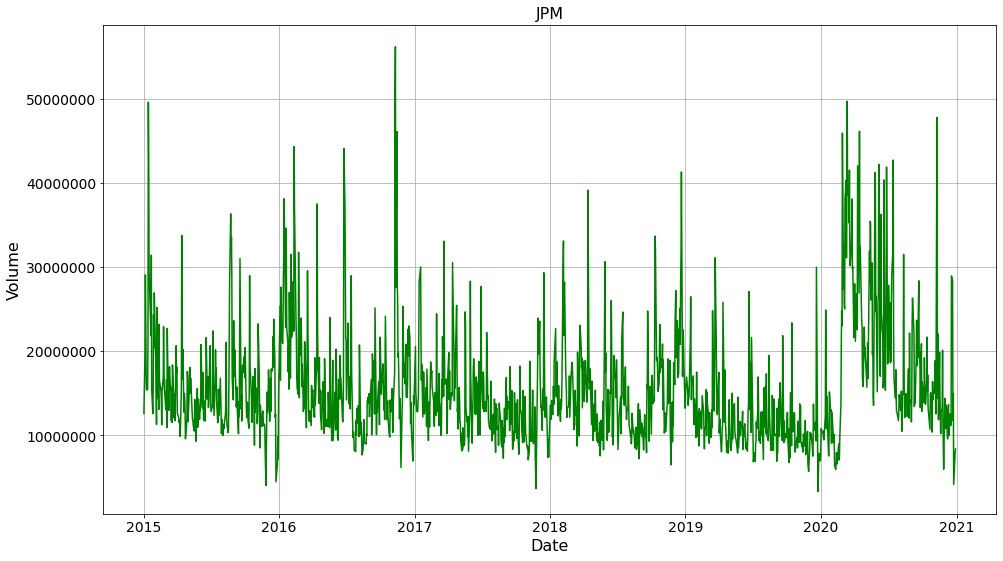

In [ ]:
JPM_volume = JPM[['Volume']]

plt.plot(JPM_volume['Volume'], color='g')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.title('JPM', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.show()

In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_JPM = JPM_close.pct_change(1).dropna()
returns_JPM[0:10]


Date
2015-01-05   -0.031045
2015-01-06   -0.025929
2015-01-07    0.001526
2015-01-08    0.022346
2015-01-09   -0.017387
2015-01-12   -0.008595
2015-01-13    0.000170
2015-01-14   -0.034500
2015-01-15   -0.032037
2015-01-16    0.017094
Name: Close, dtype: float64

In [ ]:
JPM_close.describe()

count    1509.000000
mean       92.035520
std        22.437558
min        53.070000
25%        67.169998
50%        95.500000
75%       109.940002
max       141.089996
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_JPM = JPM_close.mean()
print('Mean: {}'.format(JPM_close.mean()))

median_JPM = JPM_close.median()
print('Median: {}'.format(JPM_close.median()))

mode_JPM = JPM_close.mode()
print('Mode: {}'.format(JPM_close.mode()))


Mean: 92.03552018071422
Median: 95.5
Mode: 0    63.599998
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


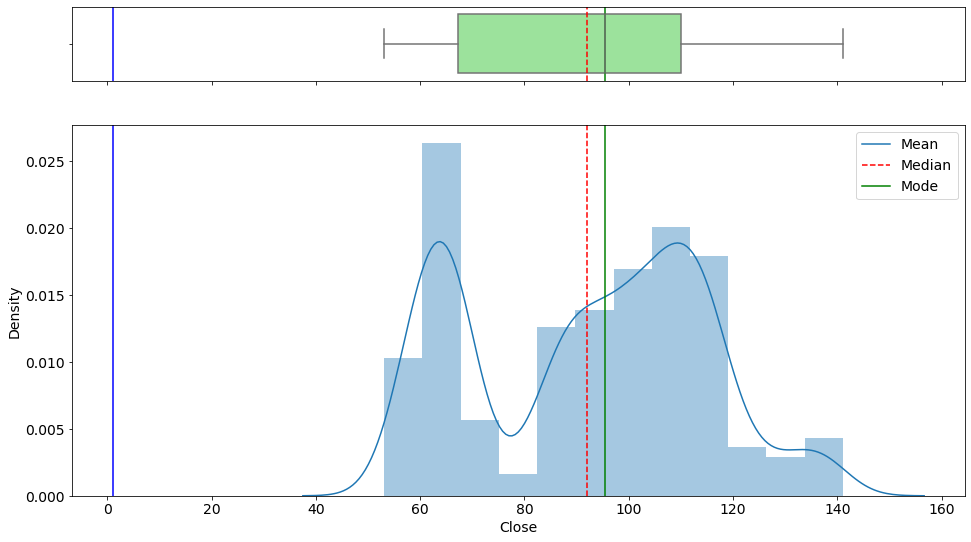

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(JPM_close, ax=ax_box,color='lightgreen')
ax_box.axvline(mean_JPM, color='r', linestyle='--')
ax_box.axvline(median_JPM, color='g', linestyle='-')
ax_box.axvline(mode_JPM.any(), color='b', linestyle='-')
sns.distplot(JPM_close, ax=ax_hist)
ax_hist.axvline(mean_JPM, color='r', linestyle='--')
ax_hist.axvline(median_JPM, color='g', linestyle='-')
ax_hist.axvline(mode_JPM.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_JPM,'Median':median_JPM,'Mode':mode_JPM})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(JPM_close)))


Skewness: -0.04687678785671464


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(JPM_close, 25) 
Q2=np.percentile(JPM_close, 50)  
Q3=np.percentile(JPM_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 67.16999816894531
Q2: 95.5
Q3: 109.94000244140625


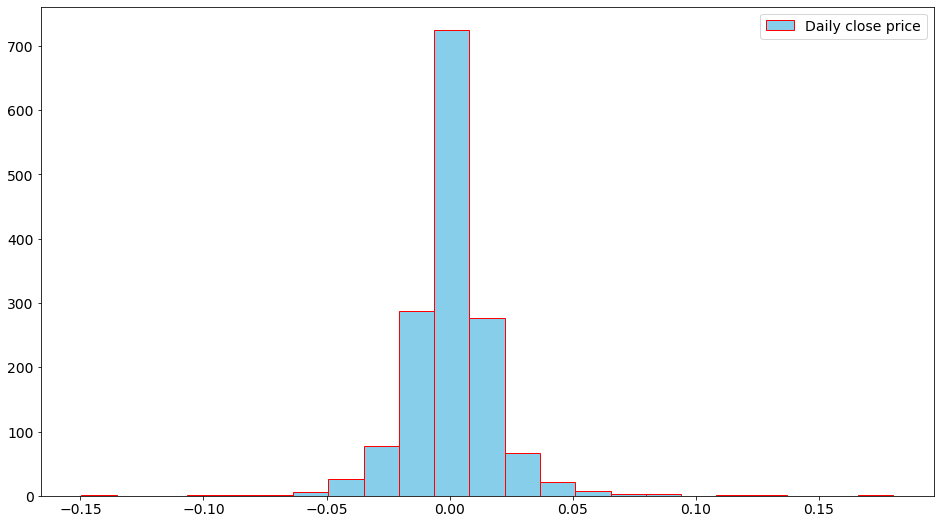

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_JPM,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


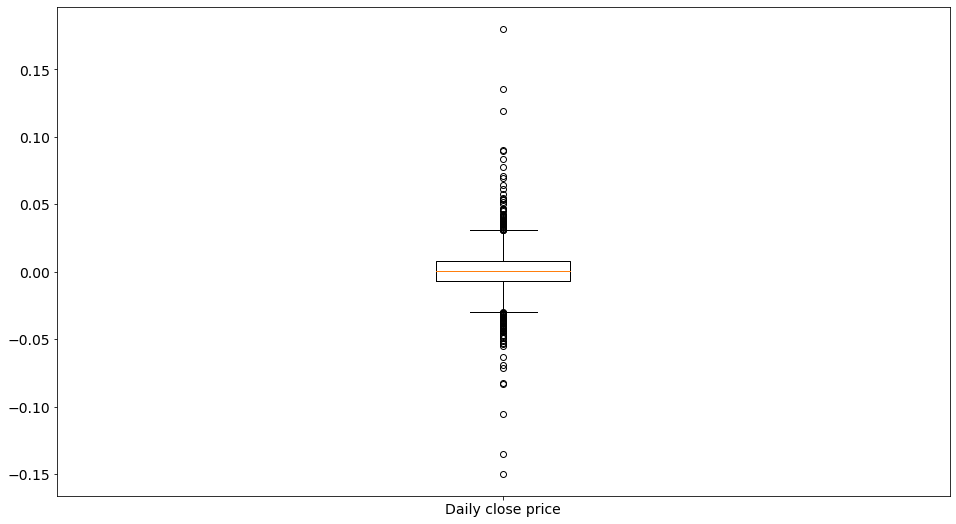

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_JPM,labels=["Daily close price"])
plt.show()


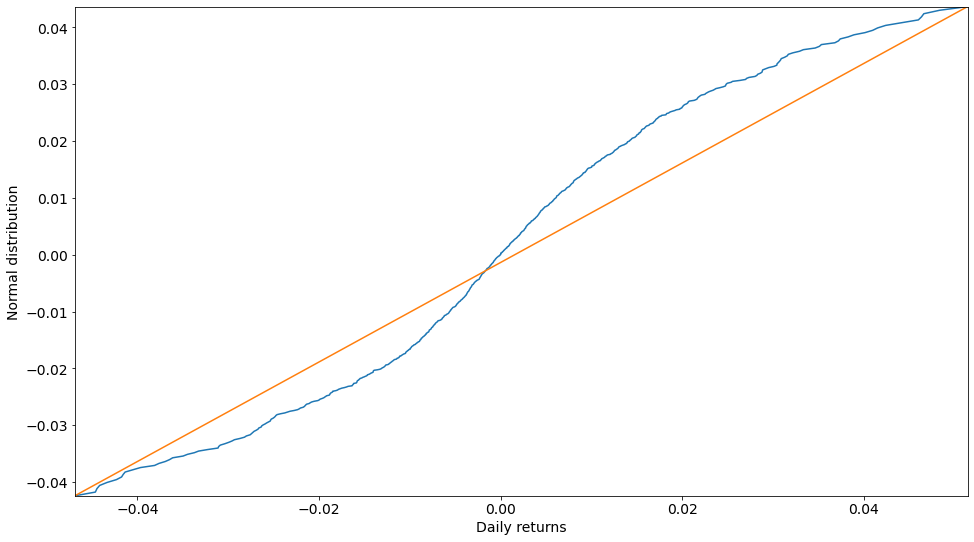

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_JPM,t)
q2 = norm.ppf(t,loc=np.mean(returns_JPM),scale=np.std(returns_JPM))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()


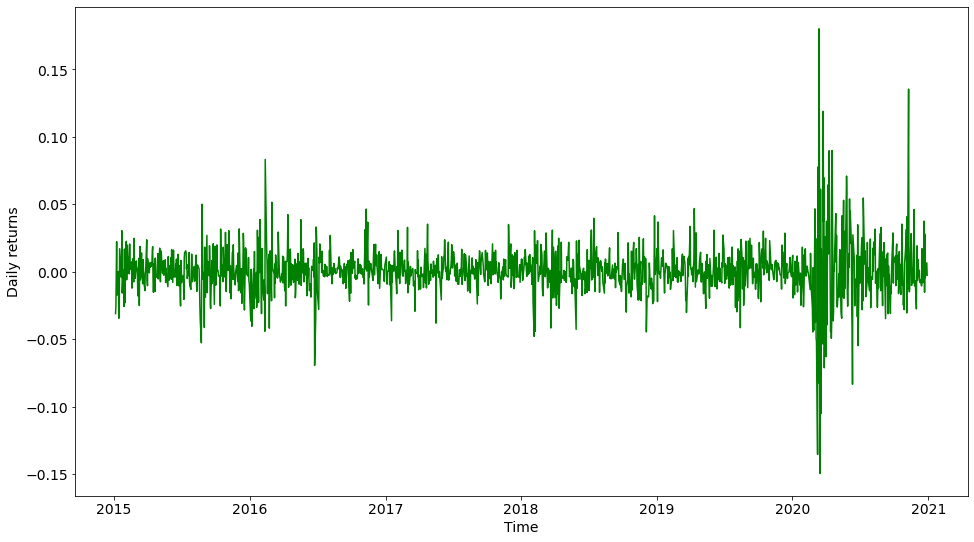

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_JPM,color = 'g')
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


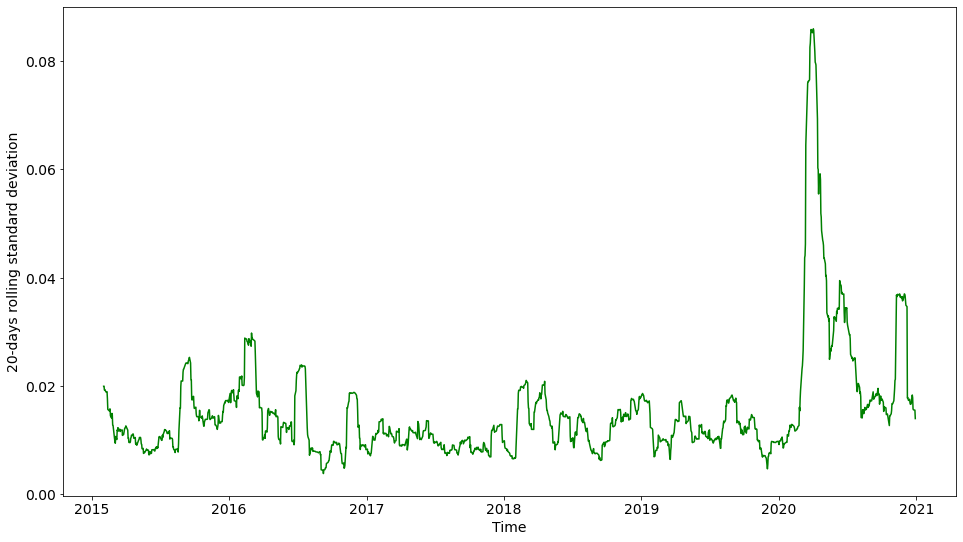

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_JPM.rolling(20).std(),color = 'g')
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


Figure(1152x648)


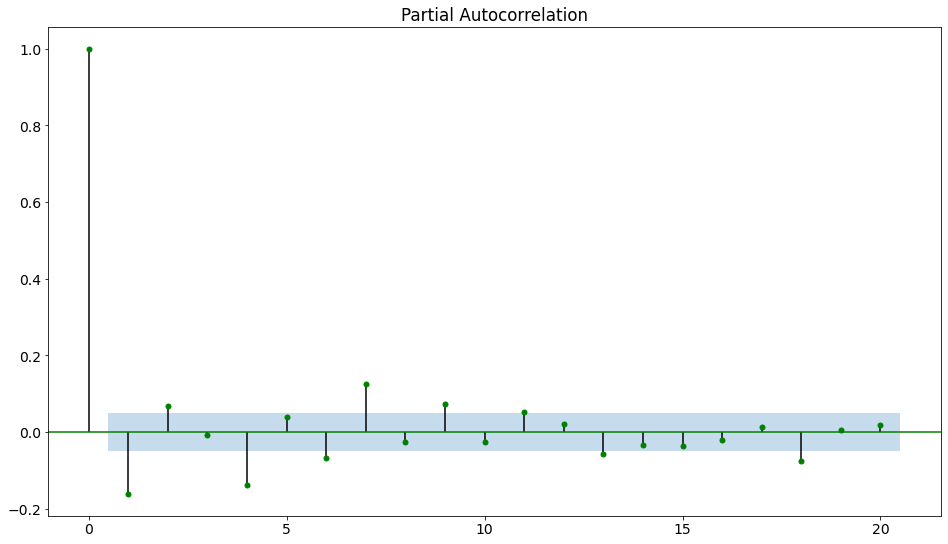

In [ ]:
# plot the partial autocorrelation function.
print(plot_pacf(returns_JPM,lags=20,color="g"))


# 9. Johnson & Johnson (JNJ)


## Data Analysis

In [ ]:
JNJ = yf.download("JNJ", start="2015-01-01", end="2020-12-30")
JNJ_close = JNJ['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
JNJ.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,105.050003,105.550003,104.129997,104.519997,88.150795,5753600
2015-01-05,104.480003,104.730003,103.680000,103.790001,87.535149,8079300
2015-01-06,104.339996,104.989998,102.940002,103.279999,87.104996,7428000
2015-01-07,103.910004,105.830002,103.809998,105.559998,89.027946,7931700
2015-01-08,106.059998,106.489998,105.750000,106.389999,89.727943,9916000


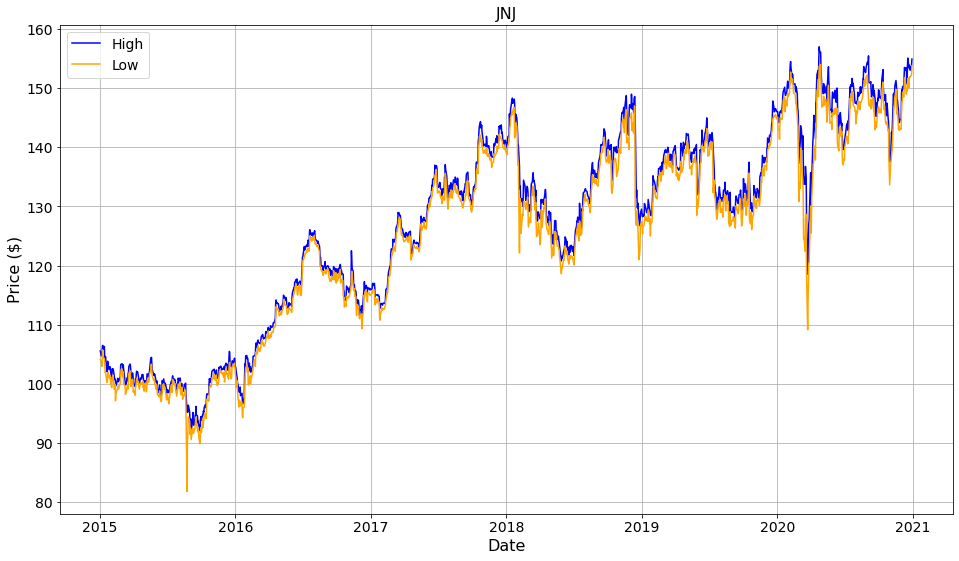

In [ ]:
#Stock price from 2015 - 2021
plt.rcParams["figure.figsize"] = [16,9]
#plt.plot(JNJ['Open'], color='g', label="Open")
#plt.plot(JNJ['Close'], color='r', label="Close")
plt.plot(JNJ['High'], color='b', label="High")
plt.plot(JNJ['Low'], color='orange', label="Low")
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.title('JNJ', fontsize=16)
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

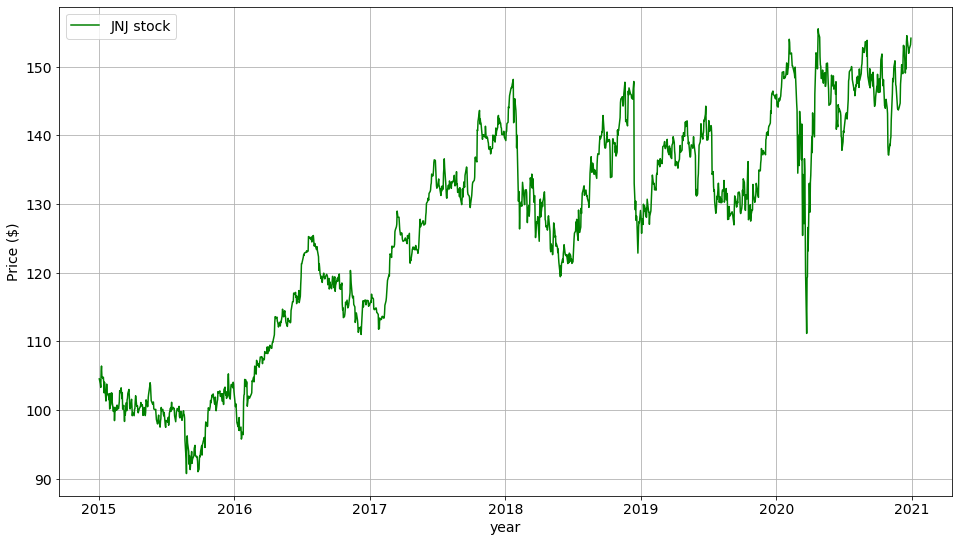

In [ ]:
plt.plot(JNJ_close,label="JNJ stock", color='g')
plt.xlabel("year")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [16, 9]
plt.rc('font', size=14)
plt.grid(True)
plt.show()


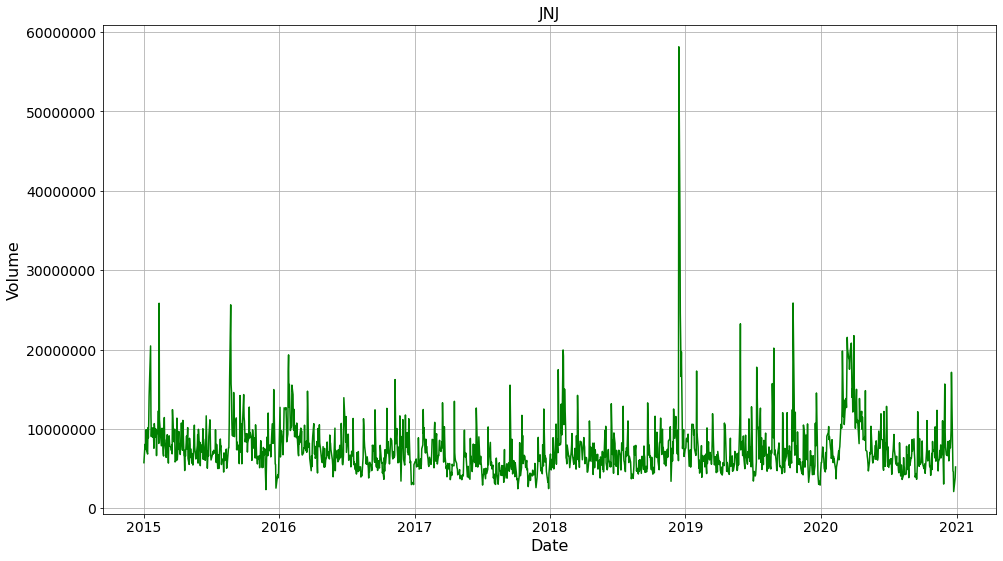

In [ ]:
JNJ_volume = JNJ[['Volume']]

plt.plot(JNJ_volume['Volume'], color='g')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.title('JNJ', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.show()

In [ ]:
# The return from one day to another is the percentage change of the closing price between the two days.
returns_JNJ = JNJ_close.pct_change(1).dropna()
returns_JNJ[0:10]


Date
2015-01-05   -0.006984
2015-01-06   -0.004914
2015-01-07    0.022076
2015-01-08    0.007863
2015-01-09   -0.013629
2015-01-12   -0.003431
2015-01-13    0.001721
2015-01-14   -0.007255
2015-01-15   -0.014519
2015-01-16    0.015123
Name: Close, dtype: float64

In [ ]:
JNJ_close.describe()

count    1509.000000
mean      126.116262
std        16.477998
min        90.730003
25%       113.720001
50%       129.630005
75%       139.399994
max       155.509995
Name: Close, dtype: float64

In [ ]:
# print them separately because we need them later in plotting .
mean_JNJ = JNJ_close.mean()
print('Mean: {}'.format(JNJ_close.mean()))

median_JNJ = JNJ_close.median()
print('Median: {}'.format(JNJ_close.median()))

mode_JNJ = JNJ_close.mode()
print('Mode: {}'.format(JNJ_close.mode()))


Mean: 126.1162624624567
Median: 129.6300048828125
Mode: 0    139.759995
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


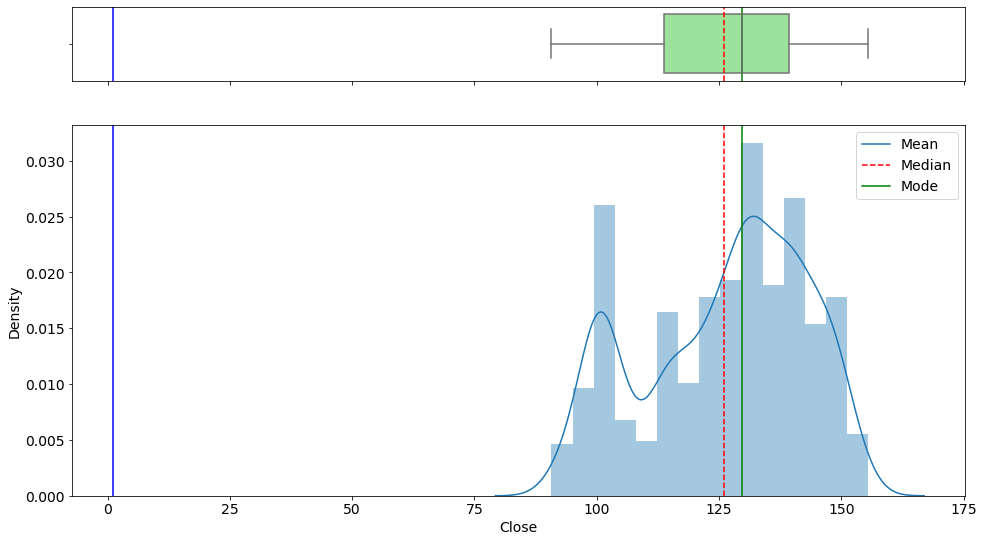

In [ ]:
# plot the mean, median and mode to compare them visually.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(JNJ_close, ax=ax_box,color='lightgreen')
ax_box.axvline(mean_JNJ, color='r', linestyle='--')
ax_box.axvline(median_JNJ, color='g', linestyle='-')
ax_box.axvline(mode_JNJ.any(), color='b', linestyle='-')
sns.distplot(JNJ_close, ax=ax_hist)
ax_hist.axvline(mean_JNJ, color='r', linestyle='--')
ax_hist.axvline(median_JNJ, color='g', linestyle='-')
ax_hist.axvline(mode_JNJ.any(), color='b', linestyle='-')
plt.legend({'Mean':mean_JNJ,'Median':median_JNJ,'Mode':mode_JNJ})
ax_box.set(xlabel='')
plt.show()


In [ ]:
# check the skewness of the distribution 
print('Skewness: {}'.format(skew(JNJ_close)))


Skewness: -0.37435131496724655


In [ ]:
#calculate 25th , 50th and the 75th percentiles.
Q1=np.percentile(JNJ_close, 25) 
Q2=np.percentile(JNJ_close, 50)  
Q3=np.percentile(JNJ_close, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))


Q1: 113.72000122070312
Q2: 129.6300048828125
Q3: 139.39999389648438


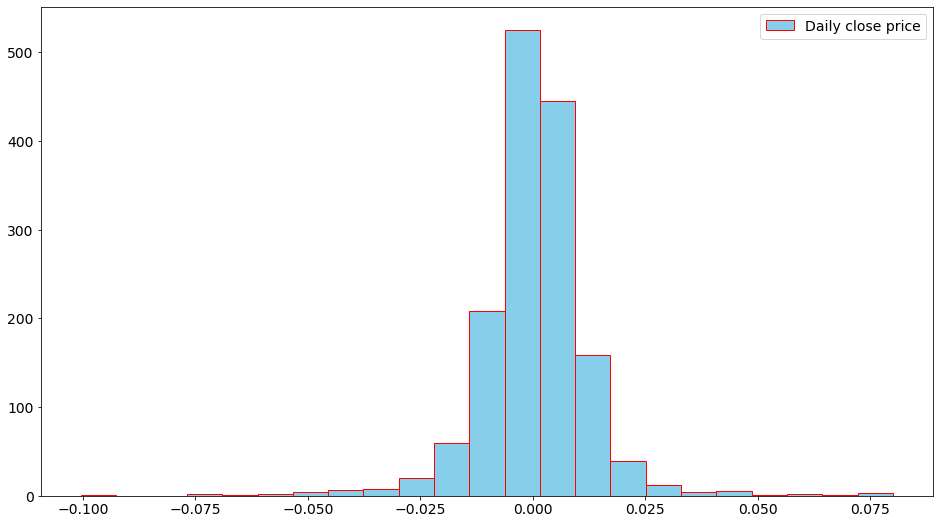

In [ ]:
# histogram about the probability distribution of returns.
plt.hist(returns_JNJ,bins="rice",label="Daily close price",color = "skyblue",edgecolor='red')
plt.legend()
plt.show()


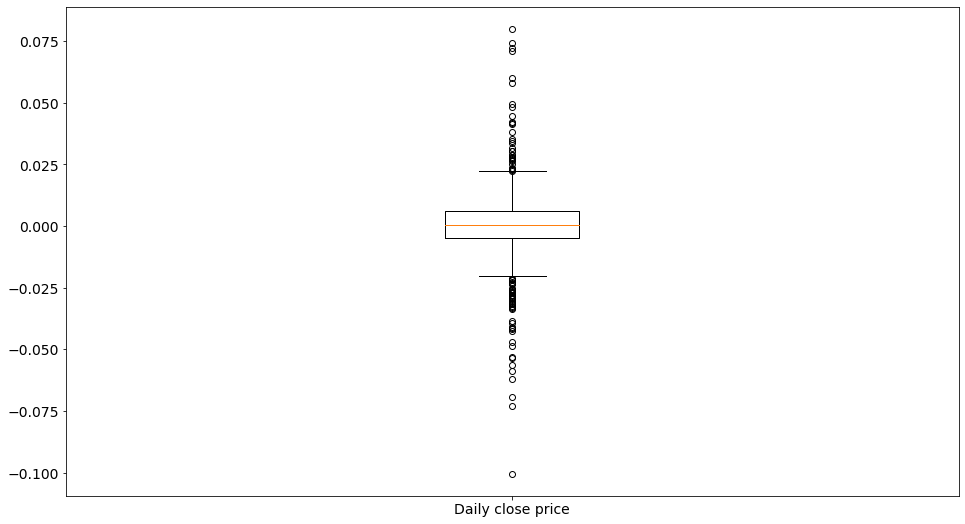

In [ ]:
# boxplot for returns to show the outliers.
plt.boxplot(returns_JNJ,labels=["Daily close price"])
plt.show()


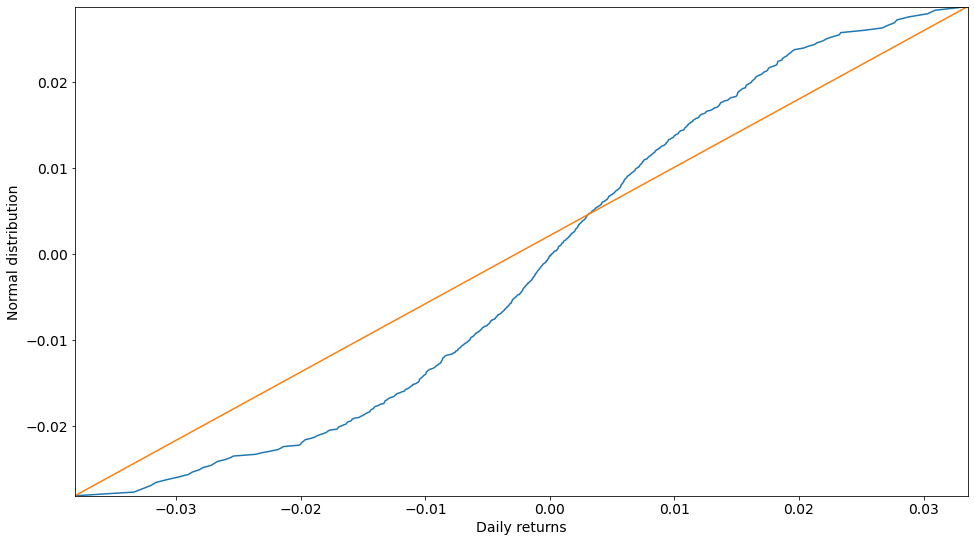

In [ ]:
 # Q-Q plot to check if it is normally distributed .
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_JNJ,t)
q2 = norm.ppf(t,loc=np.mean(returns_JNJ),scale=np.std(returns_JNJ))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()


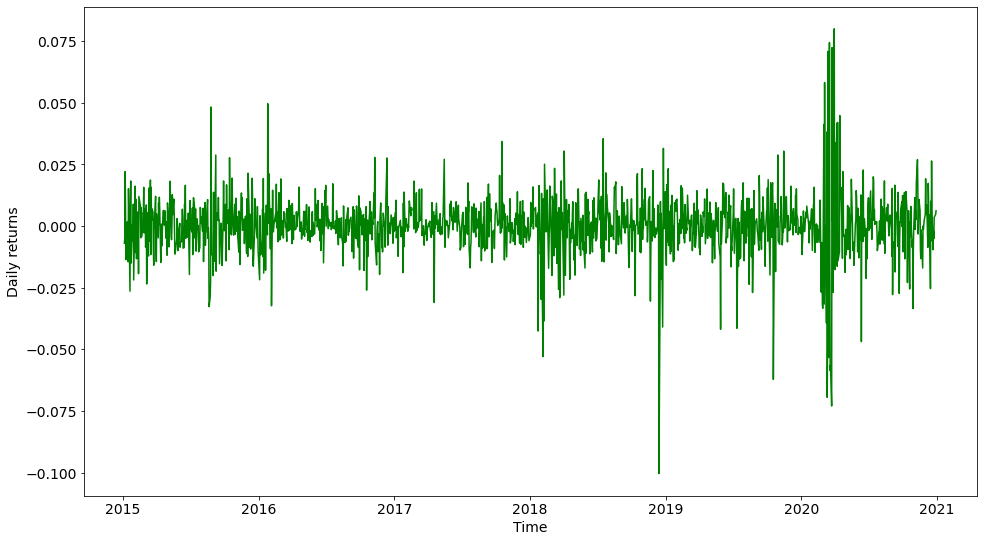

In [ ]:
# while the probability distribution is not normal, we will plot the raw time series to show the volatility.
plt.plot(returns_JNJ,color = 'g')
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()


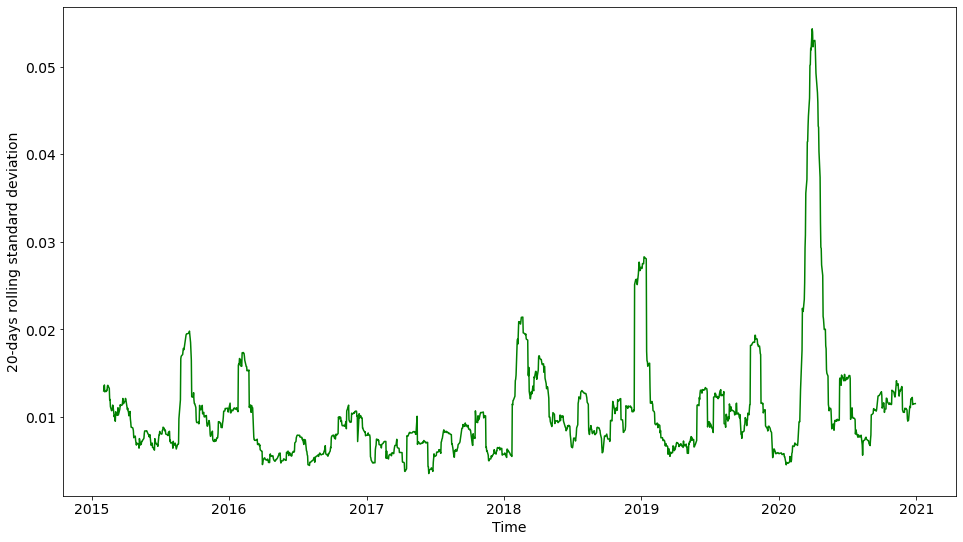

In [ ]:
# 20-days rolling standard deviation to make everything clear.
plt.plot(returns_JNJ.rolling(20).std(),color = 'g')
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()


Figure(1152x648)


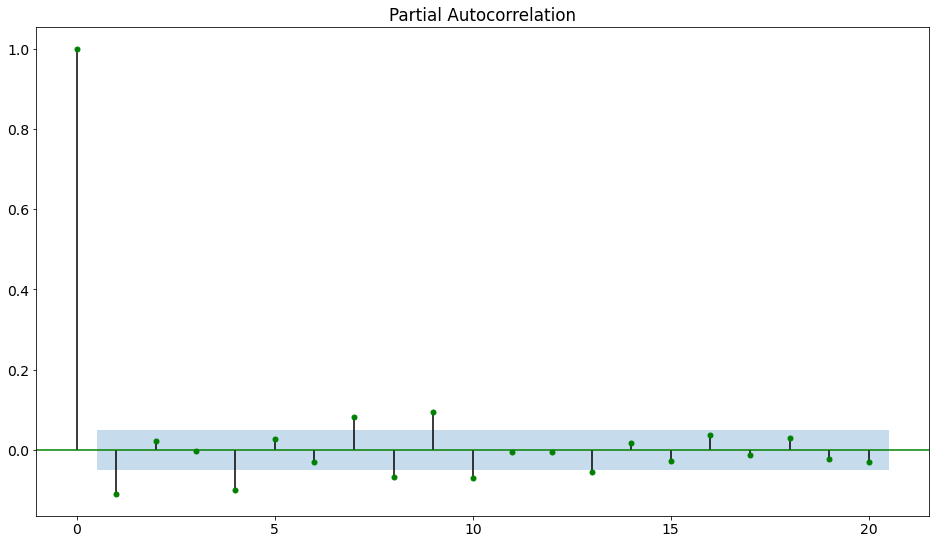

In [ ]:
# plot the partial autocorrelation function.
print(plot_pacf(returns_JNJ,lags=20,color="g"))
